___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***.

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)

In [4]:
df= pd.read_csv('Ready_to_ML.csv')
df.head().T

,0,1,2,3,4
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","CARRIL ARAGONES 4, 30007 CASILLAS, ES"
price,16950.0,80900.0,69900.0,46990.0,16800.0
body_type,Compact,Compact,Compact,Compact,Compact
type,Used,Pre-registered,Used,Used,Used
warranty,Yes,Yes,Yes,Yes,Yes
mileage,120200.0,5000.0,18900.0,18995.0,197000.0
gearbox,Manual,Automatic,Automatic,Automatic,Automatic
fuel_type,Diesel,Electric,Benzine,Benzine,Diesel


In [5]:
df.shape

(26711, 27)

In [6]:
df.columns

Index(['make_model', 'make', 'location', 'price', 'body_type', 'type',
       'warranty', 'mileage', 'gearbox', 'fuel_type', 'seller', 'engine_size',
       'gears', 'co_emissions', 'drivetrain', 'extras', 'empty_weight',
       'full_service_history', 'upholstery', 'previous_owner',
       'energy_efficiency_class', 'age', 'power_kW', 'cons_avg',
       'comfort_&_convenience_Package', 'entertainment_&_media_Package',
       'safety_&_security_Package'],
      dtype='object')

In [7]:
df.isna().sum()

make_model                       0
make                             0
location                         0
price                            0
body_type                        0
type                             0
warranty                         0
mileage                          0
gearbox                          0
fuel_type                        0
seller                           0
engine_size                      0
gears                            0
co_emissions                     0
drivetrain                       0
extras                           0
empty_weight                     0
full_service_history             0
upholstery                       0
previous_owner                   0
energy_efficiency_class          0
age                              0
power_kW                         0
cons_avg                         0
comfort_&_convenience_Package    0
entertainment_&_media_Package    0
safety_&_security_Package        0
dtype: int64

In [8]:
df.duplicated().sum()

1815

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal.

## Make_model

In [11]:
make_model_count=df.make_model.value_counts()
make_model_count

make_model
Renault Megane            825
SEAT Leon                 757
Dacia Sandero             721
Hyundai i30               699
Opel Astra                634
                         ... 
Mercedes-Benz S 65 AMG      1
Mercedes-Benz CLK 320       1
Toyota GR86                 1
Toyota Tacoma               1
Renault R 11                1
Name: count, Length: 490, dtype: int64

In [12]:
drop_model = make_model_count[make_model_count <= 100].index
drop_model

Index(['Hyundai i10', 'Peugeot 307', 'Fiat 124 Spider', 'Renault Twingo',
       'Fiat 500L', 'Opel Crossland X', 'Renault ZOE', 'Renault Laguna',
       'Mercedes-Benz A 200', 'Skoda Kamiq',
       ...
       'Mercedes-Benz ML 300', 'Dacia Break', 'Toyota Tundra',
       'Mercedes-Benz E 50 AMG', 'Mercedes-Benz CLS 300',
       'Mercedes-Benz S 65 AMG', 'Mercedes-Benz CLK 320', 'Toyota GR86',
       'Toyota Tacoma', 'Renault R 11'],
      dtype='object', name='make_model', length=420)

In [13]:
for i in drop_model:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)
    
df.reset_index(drop=True, inplace=True)

In [14]:
df.shape

(18197, 27)

## Prices

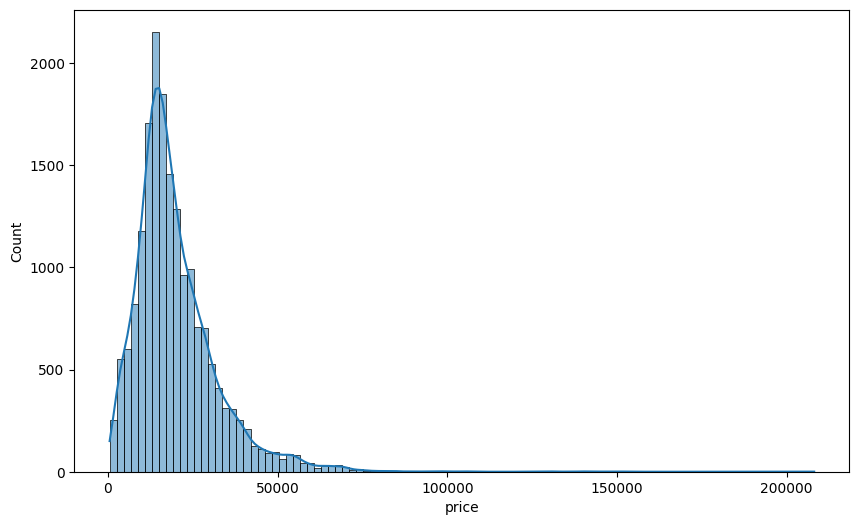

In [15]:
sns.histplot(df.price, bins=100, kde=True);


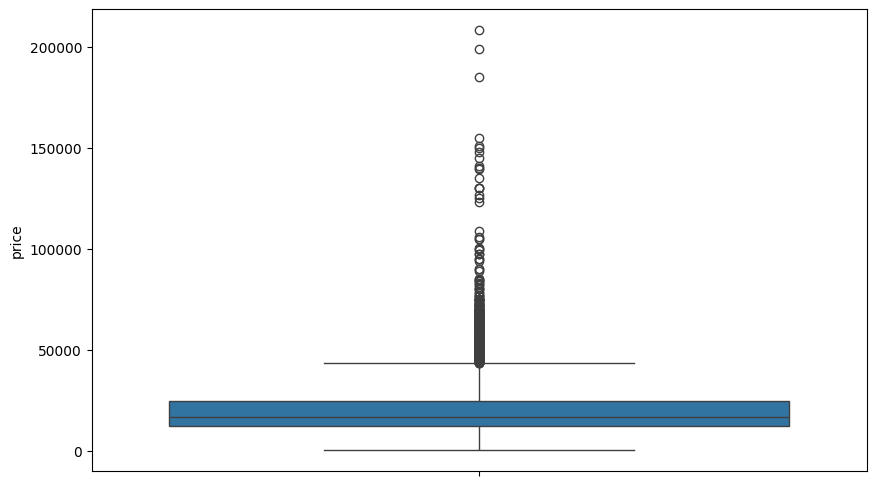

In [16]:
sns.boxplot(df.price);

In [17]:
df = df[(df.price > 7000)&(df.price < 80000)]
df

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,...,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Mercedes-Benz,"Bestel gemakkelijk Online 24/7, 1000 Brussel, BE",24400.0,Compact,Used,Yes,27150.0,Manual,Diesel,...,No,Part/Full Leather,2.0,unefficient,2.0,85.0,4.5,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,Mercedes-Benz,"Zaackoer Weg 34, 15926 Luckau, DE",7450.0,Compact,Used,No,157500.0,Manual,Diesel,...,Yes,Cloth,2.0,unefficient,12.0,80.0,5.2,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,Mercedes-Benz,"Calle Carbón 19, 29603 MALAGA, ES",29800.0,Compact,Used,Yes,21734.0,Automatic,Diesel,...,No,Cloth,2.0,unefficient,2.0,85.0,3.9,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,Mercedes-Benz,"RUA REAL 60, 36860 PONTEAEREAS, ES",21000.0,Compact,Used,Yes,172700.0,Automatic,Diesel,...,No,Cloth,3.0,unefficient,4.0,80.0,3.7,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,Mercedes-Benz,"Canal de Sant Jordi nº17 Pol. Ind. Son oms, 0...",26800.0,Compact,Used,Yes,18989.0,Automatic,Diesel,...,No,Cloth,2.0,unefficient,2.0,85.0,3.9,Standard,Standard,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18191,Volvo S90,Volvo,"AVENIDA FERNANDEZ MURUBE, 34., 41007 SEVILLA, ES",27190.0,Sedan,Used,Yes,93757.0,Automatic,Diesel,...,No,Part/Full Leather,1.0,efficient,4.0,140.0,4.4,Standard,Standard,Safety Premium Plus Package
18192,Volvo V40,Volvo,"1000 Brussel, BE",13000.0,Sedan,Used,No,114000.0,Manual,Diesel,...,Yes,Cloth,1.0,efficient,4.0,88.0,3.6,Standard,Standard,Safety Premium Package
18194,Volvo S90,Volvo,"HERMANOS LUMIERE Nº16, 29004 MALAGA, ES",37600.0,Sedan,Used,Yes,40345.0,Automatic,Diesel,...,No,Part/Full Leather,2.0,efficient,3.0,288.0,2.0,Standard,Standard,Safety Premium Plus Package
18195,Volvo C30,Volvo,"Sur rendez-vous, 5060 Sambreville, BE",7300.0,Sedan,Used,Yes,96000.0,Manual,Diesel,...,Yes,Cloth,1.0,unefficient,11.0,84.0,3.8,Standard,Standard,Safety Premium Package


## Extras

In [18]:
df['extras'].value_counts(dropna=False)

extras
Alloy wheels                                                                                                                                           3935
Roof rack                                                                                                                                               377
Alloy wheels, Roof rack                                                                                                                                 227
Steel wheels, Touch screen                                                                                                                              214
Alloy wheels, Catalytic Converter, Touch screen                                                                                                         195
                                                                                                                                                       ... 
Automatically dimming interior mirror, Headlight washer s

In [19]:
df["extras_count"] = df['extras'].str.count(',') + 1

In [20]:
df["extras_count"].value_counts(dropna=False)

extras_count
1     5071
2     1991
3     1724
4     1478
5     1216
6      939
7      907
8      677
9      566
10     521
11     404
12     346
13     245
14     168
15     153
16      80
17      39
18      20
19       7
26       1
20       1
Name: count, dtype: int64

In [21]:
df["extras"]=df["extras_count"].apply(lambda x: "Low" if (x >= 1 and x <= 5) else 
                                       ("Medium" if (x > 5 and x <= 10) else "High" if (x > 10) else None))

In [22]:
df['comfort_&_convenience_Package'].value_counts(dropna=False)

comfort_&_convenience_Package
Standard        10658
Premium          5838
Premium Plus       58
Name: count, dtype: int64

In [23]:
df.head().T

,0,1,2,3,4
make_model,Mercedes-Benz A 180,Mercedes-Benz A 180,Mercedes-Benz A 180,Mercedes-Benz A 180,Mercedes-Benz A 180
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
location,"Bestel gemakkelijk Online 24/7, 1000 Brussel, BE","Zaackoer Weg 34, 15926 Luckau, DE","Calle Carbón 19, 29603 MALAGA, ES","RUA REAL 60, 36860 PONTEAEREAS, ES","Canal de Sant Jordi nº17 Pol. Ind. Son oms, 0..."
price,24400.0,7450.0,29800.0,21000.0,26800.0
body_type,Compact,Compact,Compact,Compact,Compact
type,Used,Used,Used,Used,Used
warranty,Yes,No,Yes,Yes,Yes
mileage,27150.0,157500.0,21734.0,172700.0,18989.0
gearbox,Manual,Manual,Automatic,Automatic,Automatic
fuel_type,Diesel,Diesel,Diesel,Diesel,Diesel


In [24]:
df.drop(['extras_count', 'location', 'make'],axis=1, inplace=True)

In [25]:
df.columns

Index(['make_model', 'price', 'body_type', 'type', 'warranty', 'mileage',
       'gearbox', 'fuel_type', 'seller', 'engine_size', 'gears',
       'co_emissions', 'drivetrain', 'extras', 'empty_weight',
       'full_service_history', 'upholstery', 'previous_owner',
       'energy_efficiency_class', 'age', 'power_kW', 'cons_avg',
       'comfort_&_convenience_Package', 'entertainment_&_media_Package',
       'safety_&_security_Package'],
      dtype='object')

### Converting the Extras feature from object to numeric

In [26]:
df["extras"]=df["extras"].apply(lambda x: 1 if x=='Low' else
                                       (2 if x=='Medium' else 3 if x=='High' else None))
df['extras'].value_counts(dropna=False)
df['extras']=df['extras'].astype(int)
df['extras'].info

<bound method Series.info of 0        1
1        2
2        1
3        1
4        1
        ..
18191    1
18192    2
18194    1
18195    1
18196    1
Name: extras, Length: 16554, dtype: int64>

## multicollinearity control

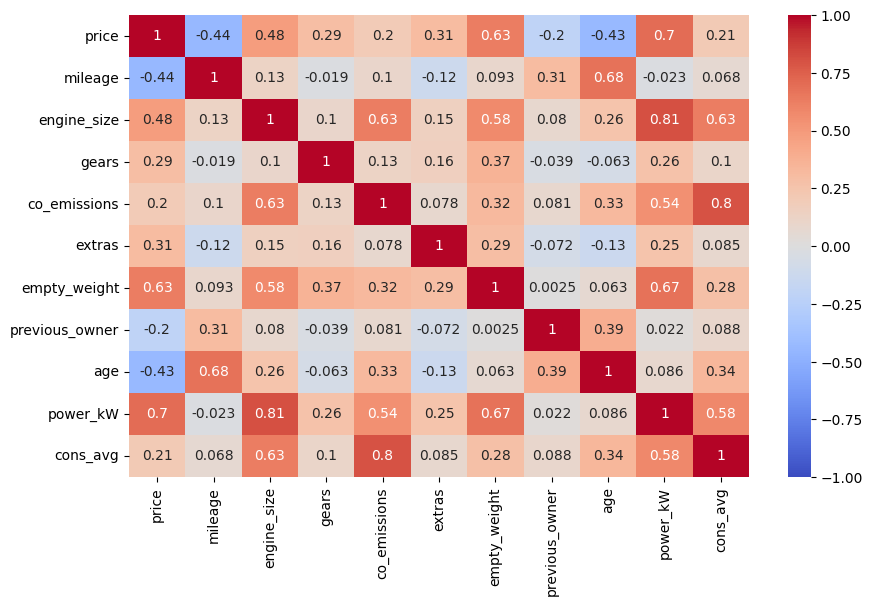

In [27]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show();

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop(columns="price") 
y = df["price"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (13243, 24)
Train target shape   :  (13243,)
Test features shape  :  (3311, 24)
Test target shape    :  (3311,)


In [32]:
X_train

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,...,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
5170,Peugeot 308,Sedan,Used,Yes,66800.0,Manual,Diesel,Dealer,1499.0,6.0,...,No,Cloth,3.0,efficient,4.0,96.0,3.7,Standard,Standard,Safety Premium Package
5981,Fiat 500X,Off-Road/Pick-up,Used,No,132062.0,Manual,Benzine,Dealer,1368.0,6.0,...,Yes,Cloth,2.0,unefficient,6.0,103.0,6.0,Standard,Plus,Safety Premium Package
10311,Dacia Duster,Off-Road/Pick-up,Used,Yes,19271.0,Manual,Diesel,Dealer,1461.0,6.0,...,No,Part/Full Leather,1.0,efficient,1.0,85.0,4.4,Standard,Standard,Safety Standard Package
9952,Dacia Sandero,Compact,Used,Yes,17239.0,Manual,Benzine,Dealer,999.0,5.0,...,No,Cloth,1.0,efficient,3.0,67.0,0.0,Standard,Standard,Safety Premium Plus Package
13142,Nissan Qashqai,Station wagon,Used,Yes,38500.0,Manual,Benzine,Dealer,1598.0,6.0,...,No,Cloth,2.0,efficient,12.0,87.0,7.7,Standard,Standard,Safety Standard Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12577,Nissan 370Z,Coupe,Used,No,72500.0,Manual,Benzine,Dealer,3696.0,6.0,...,Yes,Cloth,1.0,unefficient,9.0,253.0,10.6,Premium,Plus,Safety Premium Package
13295,Nissan Micra,Sedan,Used,Yes,61944.0,Manual,Benzine,Dealer,999.0,5.0,...,No,Cloth,2.0,efficient,4.0,52.0,4.6,Standard,Standard,Safety Premium Package
6216,Fiat 500X,Off-Road/Pick-up,Used,Yes,76220.0,Manual,Diesel,Dealer,1598.0,6.0,...,No,Part/Full Leather,1.0,unefficient,4.0,88.0,4.1,Standard,Standard,Safety Standard Package
1055,Opel Insignia,Station wagon,Used,Yes,39460.0,Manual,Diesel,Dealer,1956.0,6.0,...,No,Part/Full Leather,1.0,efficient,1.0,100.0,5.6,Premium,Plus,Safety Premium Package


In [33]:
X_test

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,...,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
3698,Peugeot 208,Compact,Used,Yes,7384.0,Automatic,Benzine,Dealer,1199.0,8.0,...,No,Part/Full Leather,1.0,efficient,2.0,96.0,4.50,Standard,Standard,Safety Standard Package
5027,Peugeot 208,Sedan,Used,No,150.0,Automatic,Benzine,Dealer,1199.0,8.0,...,No,Part/Full Leather,1.0,efficient,0.0,100.0,4.50,Premium,Plus,Safety Premium Package
4894,Peugeot 2008,Station wagon,Used,Yes,26805.0,Manual,Benzine,Dealer,1199.0,6.0,...,No,Cloth,1.0,efficient,1.0,76.0,4.85,Standard,Plus,Safety Premium Package
3202,Renault Megane,Sedan,Used,Yes,37421.0,Manual,Benzine,Dealer,1333.0,6.0,...,No,Part/Full Leather,1.0,unefficient,2.0,85.0,5.90,Standard,Standard,Safety Standard Package
7693,SEAT Leon,Station wagon,Used,No,29943.0,Automatic,Benzine,Dealer,1984.0,7.0,...,Yes,Part/Full Leather,1.0,efficient,2.0,221.0,7.20,Standard,Plus,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Opel Corsa,Compact,Used,Yes,48124.0,Manual,Benzine,Dealer,1364.0,6.0,...,Yes,Cloth,2.0,unefficient,3.0,110.0,6.10,Premium,Standard,Safety Premium Package
3464,Peugeot 308,Compact,Used,Yes,23247.0,Manual,Benzine,Dealer,1199.0,6.0,...,No,Part/Full Leather,2.0,efficient,3.0,96.0,4.50,Standard,Standard,Safety Premium Package
10975,Toyota Aygo,Compact,Pre-registered,No,15.0,Manual,Benzine,Dealer,998.0,5.0,...,Yes,Cloth,1.0,efficient,0.0,53.0,0.00,Standard,Plus,Safety Premium Package
7473,SEAT Arona,Off-Road/Pick-up,Employee's car,Yes,9000.0,Automatic,Benzine,Dealer,999.0,7.0,...,Yes,Cloth,1.0,efficient,1.0,81.0,4.90,Premium,Plus,Safety Premium Package


In [34]:
y_train

5170     16200.0
5981     12990.0
10311    20409.0
9952     12572.0
13142    11490.0
          ...   
12577    29950.0
13295     9990.0
6216     16545.0
1055     19200.0
17421    44970.0
Name: price, Length: 13243, dtype: float64

In [35]:
y_test

3698     21990.0
5027     36900.0
4894     21880.0
3202     14790.0
7693     28470.0
          ...   
458      14990.0
3464     15300.0
10975    17540.0
7473     21890.0
5064      8500.0
Name: price, Length: 3311, dtype: float64

## OneHotEncoder

### Example

In [36]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")

# OneHotEncoder converts categorical features into dummies (0 and 1). If we want our model to treat all unique values ​​under the categorical feature equally,
# we convert our categorical data to 0 and 1 using the onehotencoder conversion algorithm.
# We could also use the get_dummies() function for this conversion, but since applying get_dummies() to all data and then separating the data into train and test sets will cause data leakege,
# categorical observations for the data we prepared for ML models must be converted into dummies features with the onehotencoder conversion algorithm.
# However, when converting to categorical data, the following should not be forgotten: if there is a hierarchical superiority or ranking (expensive,
# normal, cheap or Large, average, small, etc.) among unique observations in a categorical feature, the ordinalencoder conversion algorithm should be used.
# We will talk about this algorithm when it takes place. Conversion of categorical data to dummies features is done according to the unique categorical data in the train set where the fit process is performed.
# With the handle_unknown = "ignore" parameter, all categorical data passed in the test set and not in the train set are converted to 0. The default of this parameter is handle_unknown = "error".
# If the handle_unknown parameter remains at its default value, the onehotencoder algorithm will fail for an observation that is in the test set but not in the train set.

In [37]:
#data = {"col": ['bad','worst','good', 'good', 'bad', "bed",'good', 'good', 'bad', "car"], "y": [1,2,3,4,5,6,7,8,9,10]}
#data = pd.DataFrame(data)
#data

In [38]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(data[["col"]], data["y"], test_size=0.3, shuffle=False)

In [39]:
#X_train

In [40]:
#X_test

In [41]:
#enc.fit_transform(X_train)
# Since the fit process is done on the train set,
# the transformation (transformation) in both the train and the test set will only be made according to the unique observations in the train set.


In [42]:
#enc.transform(X_test)
# Since the transformation in the test set is made according to the unique observations in the train set,
# the unique observations in both the train and the test set are converted to 1, while the non-observations (car) are converted to 0.


## OrdinalEncoder

### Example

In [43]:
#data = {"col": ['bad','worst','good', 'good', 'bad', 'good', 'good', 'bad', "ugly", "worst"], "y": [1,2,3,4,5,6,7,8,9,10]}
#data = pd.DataFrame(data)
#data
# If unique categorical data under a featura have a hierarchical advantage over each other (very bad, bad, good)
# or (cheap, average, expensive, very expensive) etc. If we want the model to treat all observations according to
# their superiority, that is, not to treat them equally, we use the ordianlencoder conversion algorithm.
# NOTE: Ordinalencoder has a special use in tree-based models. In this usage, we will always use ordinalencoder,
# regardless of whether the observations have a hierarchical superiority to each other. As for tree based models,
# this special usage will be explained in detail.

In [44]:
#X_train, X_test, y_train, y_test = train_test_split(data[["col"]], data["y"], test_size=0.4, shuffle=False)

In [45]:
#X_train

In [46]:
#X_test

In [47]:
#from sklearn.preprocessing import OrdinalEncoder

#categories = ['worst','bad','good']
# We need to define the order of the categories explicitly.

#enc_2 = OrdinalEncoder(categories=[categories], handle_unknown="use_encoded_value", unknown_value=-1).set_output(transform="pandas")
# In ordinal encoder we can not use "ignore" case, other than that we use "use_encoded_value" parameter.
# We set the unknown_value as -1, since we want to be sure as it a different category.

In [48]:
#enc_2.fit_transform(X_train)

In [49]:
#enc_2.transform(X_test)

### Converting Object Features into Numerical Features Using Make Column Transformer with OrdinalEncoder and OneHotEncoder

In [50]:
df.head().T

,0,1,2,3,4
make_model,Mercedes-Benz A 180,Mercedes-Benz A 180,Mercedes-Benz A 180,Mercedes-Benz A 180,Mercedes-Benz A 180
price,24400.0,7450.0,29800.0,21000.0,26800.0
body_type,Compact,Compact,Compact,Compact,Compact
type,Used,Used,Used,Used,Used
warranty,Yes,No,Yes,Yes,Yes
mileage,27150.0,157500.0,21734.0,172700.0,18989.0
gearbox,Manual,Manual,Automatic,Automatic,Automatic
fuel_type,Diesel,Diesel,Diesel,Diesel,Diesel
seller,Dealer,Dealer,Dealer,Dealer,Dealer
engine_size,1461.0,1991.0,1461.0,1461.0,1461.0


### X_train Encoding

In [51]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")

In [52]:
X_train_ohe= enc.fit_transform(X_train[['make_model','body_type', 'type', 'warranty','gearbox', 'fuel_type', 'seller', 'drivetrain', 
                      'full_service_history', 'upholstery', 'energy_efficiency_class']])
X_train_ohe

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,...,seller_Private seller,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,full_service_history_No,full_service_history_Yes,upholstery_Cloth,upholstery_Part/Full Leather,energy_efficiency_class_efficient,energy_efficiency_class_unefficient
5170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5981,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
10311,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9952,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
13142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
13295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6216,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [53]:
from sklearn.preprocessing import OrdinalEncoder

In [54]:
df['comfort_&_convenience_Package'].value_counts()

comfort_&_convenience_Package
Standard        10658
Premium          5838
Premium Plus       58
Name: count, dtype: int64

In [55]:
categorie_com=['Standard', 'Premium', 'Premium Plus']
categorie_ent =['Standard', 'Plus']
categorie_sec=['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [56]:
enc_2 = OrdinalEncoder(categories=[categorie_com,categorie_ent,categorie_sec], handle_unknown="use_encoded_value", unknown_value=-1).set_output(transform="pandas")

In [57]:
X_train_ord_enc= enc_2.fit_transform(X_train[['comfort_&_convenience_Package','entertainment_&_media_Package', 'safety_&_security_Package']])
X_train_ord_enc

,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
5170,0.0,0.0,1.0
5981,0.0,1.0,1.0
10311,0.0,0.0,0.0
9952,0.0,0.0,2.0
13142,0.0,0.0,0.0
...,...,...,...
12577,1.0,1.0,1.0
13295,0.0,0.0,1.0
6216,0.0,0.0,0.0
1055,1.0,1.0,1.0


In [58]:
X_train_num = []
for column in X_train.columns:
    if X_train[column].dtype in ['int64', 'float64']: 
        X_train_num.append(column)
X_train_num = X_train[X_train_num]      

In [59]:
X_train_num

,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
5170,66800.0,1499.0,6.0,97.0,1,1280.0,3.0,4.0,96.0,3.7
5981,132062.0,1368.0,6.0,139.0,1,1295.0,2.0,6.0,103.0,6.0
10311,19271.0,1461.0,6.0,115.0,1,1405.0,1.0,1.0,85.0,4.4
9952,17239.0,999.0,5.0,117.0,1,1072.0,1.0,3.0,67.0,0.0
13142,38500.0,1598.0,6.0,139.0,1,1255.0,2.0,12.0,87.0,7.7
...,...,...,...,...,...,...,...,...,...,...
12577,72500.0,3696.0,6.0,251.0,2,1496.0,1.0,9.0,253.0,10.6
13295,61944.0,999.0,5.0,103.0,1,1135.0,2.0,4.0,52.0,4.6
6216,76220.0,1598.0,6.0,109.0,1,1320.0,1.0,4.0,88.0,4.1
1055,39460.0,1956.0,6.0,145.0,3,1666.0,1.0,1.0,100.0,5.6


In [60]:
X_train_new= X_train_ohe.join([X_train_ord_enc,X_train_num] )
X_train_new

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,...,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
5170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,66800.0,1499.0,6.0,97.0,1,1280.0,3.0,4.0,96.0,3.7
5981,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,132062.0,1368.0,6.0,139.0,1,1295.0,2.0,6.0,103.0,6.0
10311,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19271.0,1461.0,6.0,115.0,1,1405.0,1.0,1.0,85.0,4.4
9952,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17239.0,999.0,5.0,117.0,1,1072.0,1.0,3.0,67.0,0.0
13142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38500.0,1598.0,6.0,139.0,1,1255.0,2.0,12.0,87.0,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,72500.0,3696.0,6.0,251.0,2,1496.0,1.0,9.0,253.0,10.6
13295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,61944.0,999.0,5.0,103.0,1,1135.0,2.0,4.0,52.0,4.6
6216,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,76220.0,1598.0,6.0,109.0,1,1320.0,1.0,4.0,88.0,4.1
1055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39460.0,1956.0,6.0,145.0,3,1666.0,1.0,1.0,100.0,5.6


### X_test Encoding

In [61]:
X_test_ohe= enc.transform(X_test[['make_model','body_type', 'type', 'warranty','gearbox', 'fuel_type', 'seller', 'drivetrain', 
                                        'full_service_history', 'upholstery', 'energy_efficiency_class']])
X_test_ohe

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,...,seller_Private seller,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,full_service_history_No,full_service_history_Yes,upholstery_Cloth,upholstery_Part/Full Leather,energy_efficiency_class_efficient,energy_efficiency_class_unefficient
3698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
10975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
7473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [62]:
X_test_ord_enc= enc_2.transform(X_test[['comfort_&_convenience_Package','entertainment_&_media_Package', 'safety_&_security_Package']])
X_test_ord_enc

,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
3698,0.0,0.0,0.0
5027,1.0,1.0,1.0
4894,0.0,1.0,1.0
3202,0.0,0.0,0.0
7693,0.0,1.0,1.0
...,...,...,...
458,1.0,0.0,1.0
3464,0.0,0.0,1.0
10975,0.0,1.0,1.0
7473,1.0,1.0,1.0


In [63]:
X_test_num = []
for column in X_test.columns:
    if X_test[column].dtype in ['int64', 'float64']: 
        X_test_num.append(column)
X_test_num = X_test[X_test_num]

In [64]:
X_test_num

,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
3698,7384.0,1199.0,8.0,104.0,1,1158.0,1.0,2.0,96.0,4.50
5027,150.0,1199.0,8.0,99.0,1,1530.0,1.0,0.0,100.0,4.50
4894,26805.0,1199.0,6.0,122.0,1,1235.0,1.0,1.0,76.0,4.85
3202,37421.0,1333.0,6.0,127.0,1,1315.0,1.0,2.0,85.0,5.90
7693,29943.0,1984.0,7.0,171.0,3,1557.0,1.0,2.0,221.0,7.20
...,...,...,...,...,...,...,...,...,...,...
458,48124.0,1364.0,6.0,136.0,2,1214.0,2.0,3.0,110.0,6.10
3464,23247.0,1199.0,6.0,129.0,1,1165.0,2.0,3.0,96.0,4.50
10975,15.0,998.0,5.0,0.0,1,1015.0,1.0,0.0,53.0,0.00
7473,9000.0,999.0,7.0,113.0,1,1308.0,1.0,1.0,81.0,4.90


In [65]:
X_test_new= X_test_ohe.join([X_test_ord_enc,X_test_num] )
X_test_new

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,...,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
3698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7384.0,1199.0,8.0,104.0,1,1158.0,1.0,2.0,96.0,4.50
5027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,150.0,1199.0,8.0,99.0,1,1530.0,1.0,0.0,100.0,4.50
4894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26805.0,1199.0,6.0,122.0,1,1235.0,1.0,1.0,76.0,4.85
3202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37421.0,1333.0,6.0,127.0,1,1315.0,1.0,2.0,85.0,5.90
7693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29943.0,1984.0,7.0,171.0,3,1557.0,1.0,2.0,221.0,7.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48124.0,1364.0,6.0,136.0,2,1214.0,2.0,3.0,110.0,6.10
3464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23247.0,1199.0,6.0,129.0,1,1165.0,2.0,3.0,96.0,4.50
10975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,998.0,5.0,0.0,1,1015.0,1.0,0.0,53.0,0.00
7473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9000.0,999.0,7.0,113.0,1,1308.0,1.0,1.0,81.0,4.90


## Scaling

In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler().set_output(transform="pandas")

In [67]:
X_train_new.describe()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,...,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
count,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,...,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000
mean,0.020992,0.008004,0.037831,0.023333,0.014121,0.022578,0.005361,0.026051,0.021974,0.026958,...,56204.031898,1630.158197,5.844371,123.319225,1.397418,1374.429661,1.357321,4.079287,111.458959,5.267806
std,0.143364,0.089111,0.190795,0.150965,0.117993,0.148559,0.073027,0.159294,0.146604,0.161966,...,48031.045684,706.565720,1.345425,49.010938,0.647010,252.667530,0.722748,3.410702,55.863432,2.089621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,695.000000,1.000000,0.000000,43.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17820.000000,1200.000000,5.000000,103.000000,1.000000,1190.000000,1.000000,2.000000,77.000000,4.200000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,45700.000000,1498.000000,6.000000,117.000000,1.000000,1335.000000,1.000000,3.000000,96.000000,5.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,85151.000000,1968.000000,6.000000,137.000000,2.000000,1505.000000,2.000000,5.000000,125.000000,5.900000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,415000.000000,5812.000000,8.000000,327.000000,3.000000,2395.000000,9.000000,20.000000,419.000000,18.300000


In [68]:
X_train_new_scaled = scaler.fit_transform(X_train_new)

In [69]:
X_train_new_scaled

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,...,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
5170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.160964,0.257915,0.714286,0.296636,0.0,0.344118,0.250,0.20,0.140957,0.202186
5981,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.318222,0.235375,0.714286,0.425076,0.0,0.352941,0.125,0.30,0.159574,0.327869
10311,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.046436,0.251376,0.714286,0.351682,0.0,0.417647,0.000,0.05,0.111702,0.240437
9952,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.041540,0.171886,0.571429,0.357798,0.0,0.221765,0.000,0.15,0.063830,0.000000
13142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.092771,0.274948,0.714286,0.425076,0.0,0.329412,0.125,0.60,0.117021,0.420765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.174699,0.635926,0.714286,0.767584,0.5,0.471176,0.000,0.45,0.558511,0.579235
13295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.149263,0.171886,0.571429,0.314985,0.0,0.258824,0.125,0.20,0.023936,0.251366
6216,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.183663,0.274948,0.714286,0.333333,0.0,0.367647,0.000,0.20,0.119681,0.224044
1055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.095084,0.336545,0.714286,0.443425,1.0,0.571176,0.000,0.05,0.151596,0.306011


In [70]:
X_train_new_scaled.describe()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,...,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
count,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,...,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000
mean,0.020992,0.008004,0.037831,0.023333,0.014121,0.022578,0.005361,0.026051,0.021974,0.026958,...,0.135431,0.280481,0.692053,0.377123,0.198709,0.399665,0.044665,0.203964,0.182072,0.287858
std,0.143364,0.089111,0.190795,0.150965,0.117993,0.148559,0.073027,0.159294,0.146604,0.161966,...,0.115737,0.121570,0.192204,0.149881,0.323505,0.148628,0.090344,0.170535,0.148573,0.114187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.042940,0.206469,0.571429,0.314985,0.000000,0.291176,0.000000,0.100000,0.090426,0.229508
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.110120,0.257743,0.714286,0.357798,0.000000,0.376471,0.000000,0.150000,0.140957,0.273224
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.205183,0.338610,0.714286,0.418960,0.500000,0.476471,0.125000,0.250000,0.218085,0.322404
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
X_test_new_scaled = scaler.transform(X_test_new)

In [72]:
X_test_new_scaled 

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,...,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
3698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.017793,0.206297,1.000000,0.318043,0.0,0.272353,0.000,0.10,0.140957,0.245902
5027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000361,0.206297,1.000000,0.302752,0.0,0.491176,0.000,0.00,0.151596,0.245902
4894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.064590,0.206297,0.714286,0.373089,0.0,0.317647,0.000,0.05,0.087766,0.265027
3202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.090171,0.229353,0.714286,0.388379,0.0,0.364706,0.000,0.10,0.111702,0.322404
7693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.072152,0.341363,0.857143,0.522936,1.0,0.507059,0.000,0.10,0.473404,0.393443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.115961,0.234687,0.714286,0.415902,0.5,0.305294,0.125,0.15,0.178191,0.333333
3464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.056017,0.206297,0.714286,0.394495,0.0,0.276471,0.125,0.15,0.140957,0.245902
10975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000036,0.171714,0.571429,0.000000,0.0,0.188235,0.000,0.00,0.026596,0.000000
7473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.021687,0.171886,0.857143,0.345566,0.0,0.360588,0.000,0.05,0.101064,0.267760


In [73]:
X_test_new_scaled.describe()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,...,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
count,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,...,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000
mean,0.016007,0.009967,0.047116,0.022652,0.014497,0.022350,0.004530,0.021142,0.019027,0.030504,...,0.136237,0.278816,0.687621,0.372999,0.192540,0.395300,0.043869,0.198565,0.179922,0.284006
std,0.125522,0.099350,0.211918,0.148813,0.119546,0.147841,0.067165,0.143878,0.136642,0.171997,...,0.118543,0.121852,0.200201,0.148415,0.318135,0.147811,0.086967,0.163857,0.148391,0.112358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.079412,0.000000,0.000000,0.002660,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.040373,0.206297,0.571429,0.311927,0.000000,0.284118,0.000000,0.100000,0.082447,0.224044
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.109566,0.257743,0.714286,0.357798,0.000000,0.374118,0.000000,0.150000,0.140957,0.267760
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.205096,0.338610,0.714286,0.415902,0.500000,0.474706,0.125000,0.250000,0.204787,0.311475
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.816867,0.894701,1.000000,0.954128,1.000000,0.999412,1.000000,1.000000,0.976064,0.743169


In [74]:
pd.DataFrame(X_train_new_scaled).agg(["mean", "std"]).round(3)

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,...,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
mean,0.021,0.008,0.038,0.023,0.014,0.023,0.005,0.026,0.022,0.027,...,0.135,0.280,0.692,0.377,0.199,0.400,0.045,0.204,0.182,0.288
std,0.143,0.089,0.191,0.151,0.118,0.149,0.073,0.159,0.147,0.162,...,0.116,0.122,0.192,0.150,0.324,0.149,0.090,0.171,0.149,0.114


In [75]:
pd.DataFrame(X_test_new_scaled).agg(["mean", "std"]).round(3)

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,...,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
mean,0.016,0.010,0.047,0.023,0.014,0.022,0.005,0.021,0.019,0.031,...,0.136,0.279,0.688,0.373,0.193,0.395,0.044,0.199,0.180,0.284
std,0.126,0.099,0.212,0.149,0.120,0.148,0.067,0.144,0.137,0.172,...,0.119,0.122,0.200,0.148,0.318,0.148,0.087,0.164,0.148,0.112


## VIF

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
df_numeric = df.select_dtypes(include ="number")

In [78]:
df_predictors = df_numeric.drop('price', axis=1)
predictors = df_predictors.columns

In [79]:
vif_data = pd.DataFrame()
vif_data['Variable'] = predictors

In [80]:
vif_data["VIF"] = [variance_inflation_factor(df[predictors].values, i) for i in range(len(predictors))]

In [81]:
vif_data
# check the VIF scores:
# 1   -> no correlation
# 1-5 -> ok
# >5  -> Alert! Be cautious and inspect more. Consider removing.
# >10 -> Severe multicolliniearity!!!

,Variable,VIF
0,mileage,4.820418
1,engine_size,24.202534
2,gears,21.165610
3,co_emissions,22.433960
4,extras,6.387178
5,empty_weight,40.634662
6,previous_owner,5.105599
7,age,5.965193
8,power_kW,17.209965
9,cons_avg,23.409218


## 3. Implement Linear Regression

 - Import the modul
 - Fit the model
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [82]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [83]:
lm.fit(X_train_new_scaled, y_train)

LinearRegression()

In [84]:
y_pred = lm.predict(X_test_new_scaled)
y_train_pred = lm.predict(X_train_new_scaled)

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
# Pre-defined functions

def train_val(model, X_train, y_train, X_test, y_test, model_name):
    """This function will help you get regression metrics on both train
    and test set provided.

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

   model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)

def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


In [86]:
pd.options.display.float_format = '{:.3f}'.format
ls = train_val(lm, X_train_new_scaled, y_train, X_test_new_scaled, y_test, 'linear')
ls

,linear_train,linear_test
R2,0.875,0.875
mae,2577.355,2635.305
mse,15231688.896,15303633.013
rmse,3902.780,3911.986


## Cross Validate

In [87]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 '

In [88]:
from sklearn.model_selection import cross_validate, cross_val_score

In [89]:
model = LinearRegression()
scores = cross_validate(model,
                        X_train_new_scaled,
                        y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'],
                        cv = 10,
                        return_train_score=True)

In [90]:
scores

{'fit_time': array([0.07845807, 0.36160064, 0.30165291, 0.28659296, 0.29505014,
        0.36400104, 0.3108089 , 0.31377792, 0.29501987, 0.35940719]),
 'score_time': array([0.03590083, 0.018466  , 0.0266099 , 0.05899787, 0.02027798,
        0.03482819, 0.03461909, 0.03816581, 0.03754234, 0.0313139 ]),
 'test_r2': array([0.87207888, 0.87886924, 0.88917715, 0.86164718, 0.87532513,
        0.86150816, 0.88736812, 0.89413742, 0.88290044, 0.81975913]),
 'train_r2': array([0.8754298 , 0.87462854, 0.87348051, 0.87652573, 0.87512702,
        0.8765341 , 0.87356697, 0.87291876, 0.87408431, 0.8810032 ]),
 'test_neg_mean_absolute_error': array([-2553.00075472, -2682.77735849, -2549.65132075, -2596.16163142,
        -2617.90785498, -2664.22885196, -2566.66540785, -2470.17824773,
        -2621.60649547, -2719.26208459]),
 'train_neg_mean_absolute_error': array([-2580.81993623, -2569.1803994 , -2588.18442692, -2574.2204883 ,
        -2581.1710714 , -2564.98590486, -2587.87373102, -2594.10034399,
    

In [91]:
pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.078,0.036,0.872,0.875,-2553.001,-2580.820,-15145332.533,-15244636.146,-3891.700,-3904.438,-0.132,-0.132
2,0.362,0.018,0.879,0.875,-2682.777,-2569.180,-15452527.399,-15213604.708,-3930.970,-3900.462,-0.137,-0.131
3,0.302,0.027,0.889,0.873,-2549.651,-2588.184,-13360449.595,-15452575.817,-3655.195,-3930.976,-0.130,-0.132
4,0.287,0.059,0.862,0.877,-2596.162,-2574.220,-17183799.246,-15030910.267,-4145.335,-3876.972,-0.135,-0.131
5,0.295,0.020,0.875,0.875,-2617.908,-2581.171,-14636320.659,-15295552.372,-3825.744,-3910.953,-0.133,-0.132
6,0.364,0.035,0.862,0.877,-2664.229,-2564.986,-16883122.280,-15061316.962,-4108.908,-3880.891,-0.137,-0.131
7,0.311,0.035,0.887,0.874,-2566.665,-2587.874,-13683360.096,-15429156.920,-3699.103,-3927.997,-0.130,-0.132
8,0.314,0.038,0.894,0.873,-2470.178,-2594.100,-13055316.076,-15482107.960,-3613.214,-3934.731,-0.129,-0.132
9,0.295,0.038,0.883,0.874,-2621.606,-2582.435,-14385829.001,-15346720.872,-3792.866,-3917.489,-0.133,-0.132
10,0.359,0.031,0.820,0.881,-2719.262,-2560.955,-21978847.708,-14515716.961,-4688.160,-3809.950,-0.133,-0.131


In [92]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                                            0.872
train_r2                                           0.875
test_neg_mean_absolute_error                   -2604.144
train_neg_mean_absolute_error                  -2578.393
test_neg_mean_squared_error                -15576490.459
train_neg_mean_squared_error               -15207229.898
test_neg_root_mean_squared_error               -3935.120
train_neg_root_mean_squared_error              -3899.486
test_neg_mean_absolute_percentage_error           -0.133
train_neg_mean_absolute_percentage_error          -0.132
dtype: float64

In [93]:
train_val(lm, X_train_new_scaled, y_train, X_test_new_scaled, y_test, 'linear')

,linear_train,linear_test
R2,0.875,0.875
mae,2577.355,2635.305
mse,15231688.896,15303633.013
rmse,3902.780,3911.986


In [94]:
lm.coef_

array([ 4.93772502e+14,  4.93772502e+14,  4.93772502e+14,  4.93772502e+14,
        4.93772502e+14,  4.93772502e+14,  4.93772502e+14,  4.93772502e+14,
        4.93772502e+14,  4.93772502e+14,  4.93772502e+14,  4.93772502e+14,
        4.93772502e+14,  4.93772502e+14,  4.93772502e+14,  4.93772502e+14,
        4.93772502e+14,  4.93772502e+14,  4.93772502e+14,  4.93772502e+14,
        4.93772502e+14,  4.93772502e+14,  4.93772502e+14,  4.93772502e+14,
        4.93772502e+14,  4.93772502e+14,  4.93772502e+14,  4.93772502e+14,
        4.93772502e+14,  4.93772502e+14,  4.93772502e+14,  4.93772502e+14,
        4.93772502e+14,  4.93772502e+14,  4.93772502e+14,  4.93772502e+14,
        4.93772502e+14,  4.93772502e+14,  4.93772502e+14,  4.93772502e+14,
        4.93772502e+14,  4.93772502e+14,  4.93772502e+14,  4.93772502e+14,
        4.93772502e+14,  4.93772502e+14,  4.93772502e+14,  4.93772502e+14,
        4.93772502e+14,  4.93772502e+14,  4.93772502e+14,  4.93772502e+14,
        4.93772502e+14,  

In [95]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,493772501566432.312
1,493772501565093.375
2,493772501563528.625
3,493772501565072.875
4,493772501566981.750
...,...
108,3951.834
109,-1050.158
110,-17271.371
111,32124.150


In [260]:
y_pred = lm.predict(X_test_new_scaled)
lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lm_mape= mean_absolute_percentage_error(y_test, y_pred)

## Prediction Error without Outliers

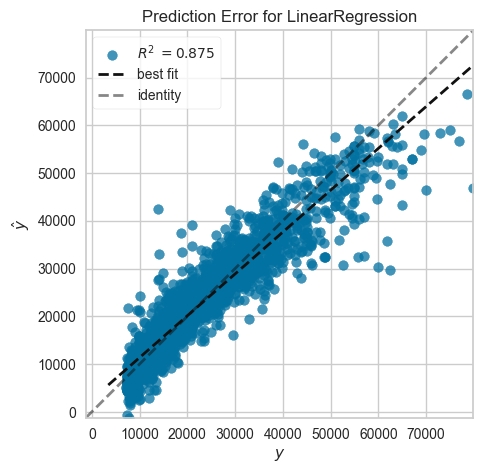

In [96]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_new_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_new_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

## Residual Plot without Outliers

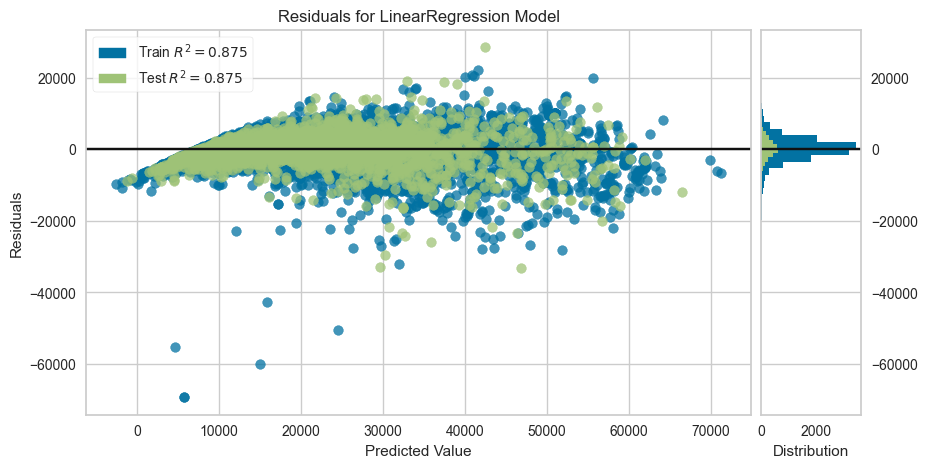

In [97]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_new_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_new_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

## Pipeline
- Read the documentation and apply pipeline
- link : https://scikit-learn.org/stable/modules/compose.html

## 4. Implement Ridge Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True  
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.

## Ridge

In [98]:
from sklearn.linear_model import Ridge

In [99]:
ridge_model = Ridge(alpha=1)

In [262]:
ridge_model.fit(X_train_new_scaled, y_train)

Ridge()

In [101]:
y_pred = ridge_model.predict(X_test_new_scaled)
y_train_pred = ridge_model.predict(X_train_new_scaled)

In [102]:
rs=train_val(ridge_model, X_train_new_scaled, y_train, X_test_new_scaled, y_test, 'ridge')
rs

,ridge_train,ridge_test
R2,0.875,0.876
mae,2574.021,2628.870
mse,15227633.231,15188137.561
rmse,3902.260,3897.196


In [103]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.875,0.875,0.875,0.876
mae,2577.355,2635.305,2574.021,2628.870
mse,15231688.896,15303633.013,15227633.231,15188137.561
rmse,3902.780,3911.986,3902.260,3897.196


## Cross Validation

In [104]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train_new_scaled, y_train,
                        scoring=['r2',
                             'neg_mean_absolute_error',
                             'neg_mean_squared_error',
                             'neg_root_mean_squared_error',
                             'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [105]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.215,0.043,0.872,0.875,-2552.625,-2576.630,-15210963.907,-15252327.984,-3900.124,-3905.423,-0.132,-0.131
2,0.379,0.041,0.879,0.875,-2676.447,-2565.518,-15410858.833,-15222959.166,-3925.667,-3901.661,-0.136,-0.131
3,0.470,0.080,0.889,0.873,-2540.373,-2583.201,-13342259.035,-15452836.040,-3652.706,-3931.010,-0.129,-0.132
4,0.184,0.031,0.862,0.876,-2587.090,-2568.209,-17087764.600,-15036403.558,-4133.735,-3877.680,-0.134,-0.130
5,0.449,0.047,0.875,0.875,-2616.291,-2575.910,-14638059.375,-15306064.181,-3825.972,-3912.297,-0.132,-0.131
6,0.418,0.016,0.860,0.877,-2658.713,-2560.035,-17053386.292,-15063258.982,-4129.575,-3881.141,-0.136,-0.130
7,0.380,0.034,0.888,0.874,-2562.861,-2581.449,-13657206.437,-15426852.632,-3695.566,-3927.703,-0.130,-0.131
8,0.488,0.041,0.894,0.873,-2456.798,-2589.827,-13037568.438,-15490159.331,-3610.757,-3935.754,-0.127,-0.132
9,0.470,0.038,0.883,0.874,-2615.683,-2577.292,-14318459.238,-15350707.847,-3783.974,-3917.998,-0.133,-0.131
10,0.416,0.027,0.820,0.881,-2708.122,-2553.411,-21929165.039,-14516726.833,-4682.859,-3810.082,-0.132,-0.131


In [106]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.872
train_r2                                           0.875
test_neg_mean_absolute_error                   -2597.500
train_neg_mean_absolute_error                  -2573.148
test_neg_mean_squared_error                -15568569.119
train_neg_mean_squared_error               -15211829.656
test_neg_root_mean_squared_error               -3934.093
train_neg_root_mean_squared_error              -3900.075
test_neg_mean_absolute_percentage_error           -0.132
train_neg_mean_absolute_percentage_error          -0.131
dtype: float64

In [107]:
rs

,ridge_train,ridge_test
R2,0.875,0.876
mae,2574.021,2628.870
mse,15227633.231,15188137.561
rmse,3902.260,3897.196


In [108]:
ridge_model.coef_

array([-1.47127642e+03, -2.68917352e+03, -4.09466073e+03, -2.53318688e+03,
       -3.24929784e+02, -4.09056792e+02, -2.70245263e+03, -3.24208370e+03,
       -2.65465148e+03, -1.01313645e+03, -2.22386033e+02, -5.05436319e+02,
       -9.26349800e+03, -9.21049838e+02,  2.40880849e+03, -2.98257773e+03,
       -2.36588317e+03,  4.87075685e+03, -9.74084019e+03, -1.26856806e+04,
       -1.25533626e+03, -3.14257790e+03, -2.25412867e+03,  1.46720456e+03,
        1.24080470e+03, -3.90584088e+03, -3.26864206e+03, -2.78397700e+02,
       -4.07248138e+03,  1.98849819e+01, -1.71819229e+03,  5.83111473e+02,
        4.23918691e+03, -2.26720296e+03, -1.88596151e+03,  3.38930454e+03,
       -1.95604153e+02,  2.57990870e+03, -5.49749328e+02, -7.44565326e+02,
       -1.27612583e+03,  2.21525411e+02, -5.23567608e+02,  2.06308457e+02,
       -9.43814198e+02,  2.64587688e+03, -2.23505379e+03, -2.09932643e+03,
       -2.71739541e+03,  4.23256867e+03,  7.82983305e+03,  3.03405124e+02,
       -1.99674277e+03,  

In [109]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [110]:
pd.concat([lm_df,rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,493772501566432.312,-1471.276
1,493772501565093.375,-2689.174
2,493772501563528.625,-4094.661
3,493772501565072.875,-2533.187
4,493772501566981.750,-324.930
...,...,...
108,3951.834,4665.861
109,-1050.158,-1087.047
110,-17271.371,-17178.661
111,32124.150,31699.587


In [263]:
y_pred = ridge_model.predict(X_test_new_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = mean_squared_error(y_test, y_pred, squared=False)
rm_mape= mean_absolute_percentage_error(y_test, y_pred)

## Finding best alpha for Ridge

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
alpha_space = np.linspace(0.001, 100, 100)
alpha_space

array([1.00000000e-03, 1.01109091e+00, 2.02118182e+00, 3.03127273e+00,
       4.04136364e+00, 5.05145455e+00, 6.06154545e+00, 7.07163636e+00,
       8.08172727e+00, 9.09181818e+00, 1.01019091e+01, 1.11120000e+01,
       1.21220909e+01, 1.31321818e+01, 1.41422727e+01, 1.51523636e+01,
       1.61624545e+01, 1.71725455e+01, 1.81826364e+01, 1.91927273e+01,
       2.02028182e+01, 2.12129091e+01, 2.22230000e+01, 2.32330909e+01,
       2.42431818e+01, 2.52532727e+01, 2.62633636e+01, 2.72734545e+01,
       2.82835455e+01, 2.92936364e+01, 3.03037273e+01, 3.13138182e+01,
       3.23239091e+01, 3.33340000e+01, 3.43440909e+01, 3.53541818e+01,
       3.63642727e+01, 3.73743636e+01, 3.83844545e+01, 3.93945455e+01,
       4.04046364e+01, 4.14147273e+01, 4.24248182e+01, 4.34349091e+01,
       4.44450000e+01, 4.54550909e+01, 4.64651818e+01, 4.74752727e+01,
       4.84853636e+01, 4.94954545e+01, 5.05055455e+01, 5.15156364e+01,
       5.25257273e+01, 5.35358182e+01, 5.45459091e+01, 5.55560000e+01,
      

In [113]:
ridge_model = Ridge()
param_grid = {"alpha":alpha_space}

In [114]:
grid_ridge = GridSearchCV(estimator = ridge_model,
                          param_grid = param_grid,
                          scoring = 'neg_root_mean_squared_error',
                          cv =10,
                          verbose =2,
                          return_train_score=True)

In [115]:
grid_ridge.fit(X_train_new_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ........................................alpha=0.001; total time=   0.3s
[CV] END ........................................alpha=0.001; total time=   0.4s
[CV] END ........................................alpha=0.001; total time=   0.4s
[CV] END ........................................alpha=0.001; total time=   0.5s
[CV] END ........................................alpha=0.001; total time=   0.3s
[CV] END ........................................alpha=0.001; total time=   0.3s
[CV] END ........................................alpha=0.001; total time=   0.4s
[CV] END ........................................alpha=0.001; total time=   0.4s
[CV] END ........................................alpha=0.001; total time=   0.4s
[CV] END ........................................alpha=0.001; total time=   0.5s
[CV] END ............................alpha=1.011090909090909; total time=   0.4s
[CV] END ............................alpha=1

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.01109091e+00, 2.02118182e+00, 3.03127273e+00,
       4.04136364e+00, 5.05145455e+00, 6.06154545e+00, 7.07163636e+00,
       8.08172727e+00, 9.09181818e+00, 1.01019091e+01, 1.11120000e+01,
       1.21220909e+01, 1.31321818e+01, 1.41422727e+01, 1.51523636e+01,
       1.61624545e+01, 1.71725455e+01, 1.81826364e+01, 1...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [116]:
grid_ridge.best_params_

{'alpha': 1.011090909090909}

In [117]:
pd.DataFrame(grid_ridge.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.364,0.077,0.031,0.009,0.001,{'alpha': 0.001},-3890.536,-3925.986,-3654.277,-4142.507,...,-3929.241,-3875.715,-3910.387,-3879.696,-3925.969,-3933.713,-3915.832,-3807.963,-3898.220,35.328
1,0.371,0.070,0.035,0.013,1.011,{'alpha': 1.011090909090909},-3900.217,-3925.678,-3652.699,-4133.665,...,-3931.044,-3877.718,-3912.333,-3881.169,-3927.737,-3935.792,-3918.038,-3810.121,-3900.110,35.289
2,0.432,0.047,0.034,0.009,2.021,{'alpha': 2.021181818181818},-3907.915,-3927.520,-3652.806,-4129.000,...,-3934.875,-3881.877,-3916.370,-3884.331,-3931.487,-3939.868,-3922.372,-3814.335,-3903.998,35.254
3,0.418,0.072,0.035,0.010,3.031,{'alpha': 3.0312727272727273},-3914.449,-3930.474,-3654.075,-4126.709,...,-3939.615,-3886.939,-3921.279,-3888.316,-3936.120,-3944.689,-3927.456,-3819.295,-3908.722,35.239
4,0.396,0.052,0.033,0.010,4.041,{'alpha': 4.041363636363637},-3920.282,-3934.108,-3656.189,-4125.947,...,-3944.827,-3892.445,-3926.621,-3892.790,-3941.212,-3949.874,-3932.869,-3824.612,-3913.876,35.236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.375,0.099,0.029,0.011,95.960,{'alpha': 95.95963636363638},-4401.496,-4539.514,-4193.125,-4583.264,...,-4523.298,-4480.936,-4506.110,-4467.102,-4513.950,-4527.916,-4505.092,-4415.851,-4493.610,31.156
96,0.410,0.066,0.036,0.015,96.970,{'alpha': 96.96972727272728},-4406.440,-4545.691,-4198.591,-4588.250,...,-4528.934,-4486.638,-4511.729,-4472.780,-4519.537,-4533.574,-4510.669,-4421.638,-4499.270,31.110
97,0.353,0.092,0.035,0.016,97.980,{'alpha': 97.97981818181819},-4411.367,-4551.842,-4204.033,-4593.216,...,-4534.546,-4492.315,-4517.324,-4478.433,-4525.100,-4539.206,-4516.222,-4427.401,-4504.905,31.063
98,0.363,0.075,0.042,0.012,98.990,{'alpha': 98.9899090909091},-4416.276,-4557.967,-4209.451,-4598.164,...,-4540.135,-4497.968,-4522.894,-4484.062,-4530.638,-4544.815,-4521.751,-4433.139,-4510.516,31.017


In [118]:
grid_ridge.best_index_

1

In [119]:
pd.DataFrame(grid_ridge.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3934.114
mean_train_score   -3900.110
Name: 1, dtype: object

In [120]:
grid_ridge.best_score_

-3934.1135527293795

In [121]:
y_pred = grid_ridge.predict(X_test_new_scaled)
y_train_pred = grid_ridge.predict(X_train_new_scaled)

In [122]:
rgs = train_val(grid_ridge, X_train_new_scaled, y_train, X_test_new_scaled, y_test,"grid_ridge")
rgs

,grid_ridge_train,grid_ridge_test
R2,0.875,0.876
mae,2574.002,2628.800
mse,15227861.863,15187327.871
rmse,3902.289,3897.092


In [123]:
pd.concat([ls, rs, rgs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test
R2,0.875,0.875,0.875,0.876,0.875,0.876
mae,2577.355,2635.305,2574.021,2628.870,2574.002,2628.800
mse,15231688.896,15303633.013,15227633.231,15188137.561,15227861.863,15187327.871
rmse,3902.780,3911.986,3902.260,3897.196,3902.289,3897.092


In [124]:
grid_ridge.best_estimator_.coef_

array([-1.47237848e+03, -2.68841094e+03, -4.09393239e+03, -2.53196374e+03,
       -3.22824901e+02, -4.10442472e+02, -2.70147643e+03, -3.24213926e+03,
       -2.65413570e+03, -1.01325879e+03, -2.25332421e+02, -5.06718088e+02,
       -9.24155135e+03, -9.21696475e+02,  2.40684171e+03, -2.98158622e+03,
       -2.36582089e+03,  4.86949798e+03, -9.71949586e+03, -1.26628837e+04,
       -1.25571627e+03, -3.14172309e+03, -2.25415195e+03,  1.46615065e+03,
        1.23793756e+03, -3.90454356e+03, -3.26888638e+03, -2.79249514e+02,
       -4.07168497e+03,  1.72189256e+01, -1.71989617e+03,  5.82132827e+02,
        4.22979550e+03, -2.26598451e+03, -1.88524138e+03,  3.38701586e+03,
       -1.95827566e+02,  2.57869020e+03, -5.49684435e+02, -7.45655474e+02,
       -1.27537678e+03,  2.19743091e+02, -5.23630719e+02,  2.05325590e+02,
       -9.44937291e+02,  2.64360985e+03, -2.23455526e+03, -2.09931880e+03,
       -2.71688173e+03,  4.23046204e+03,  7.82548103e+03,  3.02901007e+02,
       -1.99662248e+03,  

In [125]:
rgm_df = pd.DataFrame(grid_ridge.best_estimator_.coef_, columns=["ridge_coef_1.011"])

In [126]:
pd.concat([lm_df,rm_df, rgm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_1.011
0,493772501566432.312,-1471.276,-1472.378
1,493772501565093.375,-2689.174,-2688.411
2,493772501563528.625,-4094.661,-4093.932
3,493772501565072.875,-2533.187,-2531.964
4,493772501566981.750,-324.930,-322.825
...,...,...,...
108,3951.834,4665.861,4673.400
109,-1050.158,-1087.047,-1087.354
110,-17271.371,-17178.661,-17177.949
111,32124.150,31699.587,31694.773


## 5. Implement Lasso Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [127]:
from sklearn.linear_model import Lasso

In [265]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train_new_scaled, y_train)

Lasso(alpha=1)

In [129]:
y_pred = lasso_model.predict(X_test_new_scaled)
y_train_pred = lasso_model.predict(X_train_new_scaled)

In [130]:
lss = train_val(lasso_model, X_train_new_scaled, y_train, X_test_new_scaled, y_test,"lasso")
lss

,lasso_train,lasso_test
R2,0.875,0.876
mae,2577.106,2627.339
mse,15254039.018,15150962.763
rmse,3905.642,3892.424


In [132]:
pd.concat([ls, rs, rgs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test
R2,0.875,0.875,0.875,0.876,0.875,0.876,0.875,0.876
mae,2577.355,2635.305,2574.021,2628.870,2574.002,2628.800,2577.106,2627.339
mse,15231688.896,15303633.013,15227633.231,15188137.561,15227861.863,15187327.871,15254039.018,15150962.763
rmse,3902.780,3911.986,3902.260,3897.196,3902.289,3897.092,3905.642,3892.424


## Cross Validation

In [133]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train_new_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [134]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,1.816,0.026,0.871,0.875,-2557.898,-2578.741,-15253473.537,-15278850.924,-3905.570,-3908.817,-0.132,-0.131
2,2.214,0.020,0.879,0.874,-2682.722,-2569.030,-15450447.746,-15246413.566,-3930.706,-3904.666,-0.137,-0.131
3,1.772,0.053,0.889,0.873,-2541.660,-2586.281,-13346295.130,-15476143.050,-3653.258,-3933.973,-0.129,-0.132
4,2.144,0.031,0.863,0.876,-2583.807,-2571.275,-17074152.831,-15058351.532,-4132.088,-3880.509,-0.134,-0.130
5,2.237,0.040,0.875,0.875,-2624.944,-2578.991,-14694746.604,-15327311.557,-3833.373,-3915.011,-0.133,-0.131
6,2.331,0.040,0.859,0.876,-2658.241,-2563.946,-17142327.805,-15090426.115,-4140.329,-3884.640,-0.136,-0.130
7,1.690,0.030,0.887,0.873,-2568.030,-2584.620,-13687237.983,-15448826.446,-3699.627,-3930.500,-0.130,-0.132
8,1.910,0.028,0.894,0.873,-2456.104,-2593.621,-13063126.333,-15516691.134,-3614.295,-3939.123,-0.127,-0.132
9,1.893,0.034,0.884,0.874,-2614.923,-2580.543,-14279337.019,-15373346.236,-3778.801,-3920.886,-0.133,-0.131
10,1.782,0.028,0.820,0.881,-2711.359,-2556.510,-21941674.121,-14542886.038,-4684.194,-3813.514,-0.133,-0.131


In [135]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.872
train_r2                                           0.875
test_neg_mean_absolute_error                   -2599.969
train_neg_mean_absolute_error                  -2576.356
test_neg_mean_squared_error                -15593281.911
train_neg_mean_squared_error               -15235924.660
test_neg_root_mean_squared_error               -3937.224
train_neg_root_mean_squared_error              -3903.164
test_neg_mean_absolute_percentage_error           -0.132
train_neg_mean_absolute_percentage_error          -0.131
dtype: float64

In [136]:
train_val(lasso_model, X_train_new_scaled, y_train, X_test_new_scaled, y_test,"lasso")

,lasso_train,lasso_test
R2,0.875,0.876
mae,2577.106,2627.339
mse,15254039.018,15150962.763
rmse,3905.642,3892.424


In [137]:
lasso_model.coef_

array([-9.79074378e+02, -1.79991015e+03, -3.27106731e+03, -1.59522398e+03,
        5.02963934e+02,  0.00000000e+00, -1.73585306e+03, -2.54582418e+03,
       -1.80438836e+03, -3.24505335e+02,  0.00000000e+00, -0.00000000e+00,
       -7.97882915e+03, -6.12522760e+01,  2.69762042e+03, -2.07737064e+03,
       -1.70725650e+03,  5.48036104e+03, -8.38694769e+03, -1.12802907e+04,
       -5.78768784e+02, -2.26785141e+03, -1.42967221e+03,  1.94823768e+03,
        1.42708174e+03, -2.94553908e+03, -2.60271195e+03,  8.05670779e+01,
       -3.19624873e+03,  1.79484889e+02, -1.16686208e+03,  9.71973098e+02,
        2.56064526e+03, -1.26717475e+03, -9.95794733e+02,  3.66145456e+03,
        4.14828546e+02,  3.03440262e+03,  0.00000000e+00, -1.52660137e+02,
       -4.38734317e+02,  4.60388973e+02,  5.34020358e+01,  6.14122613e+02,
       -3.53664633e+02,  2.90890471e+03, -1.39905930e+03, -1.44507047e+03,
       -1.83626282e+03,  4.57508150e+03,  7.99747015e+03,  8.72447133e+02,
       -1.20060856e+03,  

In [138]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [139]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_1.011,lasso_coef_1
0,493772501566432.312,-1471.276,-1472.378,-979.074
1,493772501565093.375,-2689.174,-2688.411,-1799.910
2,493772501563528.625,-4094.661,-4093.932,-3271.067
3,493772501565072.875,-2533.187,-2531.964,-1595.224
4,493772501566981.750,-324.930,-322.825,502.964
...,...,...,...,...
108,3951.834,4665.861,4673.400,5346.027
109,-1050.158,-1087.047,-1087.354,-960.673
110,-17271.371,-17178.661,-17177.949,-17105.571
111,32124.150,31699.587,31694.773,32181.789


In [266]:
y_pred = lasso_model.predict(X_test_new_scaled)
ls_R2 = r2_score(y_test, y_pred)
ls_mae = mean_absolute_error(y_test, y_pred)
ls_rmse = mean_squared_error(y_test, y_pred, squared=False)
ls_mape= mean_absolute_percentage_error(y_test, y_pred)

## Finding best alpha for Lasso

In [140]:
lasso_model = Lasso(max_iter=100)

In [141]:
param_grid = {"alpha":alpha_space}

In [142]:
grid_lasso = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          verbose=2,
                          return_train_score=True)

In [143]:
grid_lasso.fit(X_train_new_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ........................................alpha=0.001; total time=   0.6s
[CV] END ........................................alpha=0.001; total time=   0.7s
[CV] END ........................................alpha=0.001; total time=   0.7s
[CV] END ........................................alpha=0.001; total time=   0.8s
[CV] END ........................................alpha=0.001; total time=   0.7s
[CV] END ........................................alpha=0.001; total time=   0.7s
[CV] END ........................................alpha=0.001; total time=   0.7s
[CV] END ........................................alpha=0.001; total time=   0.7s
[CV] END ........................................alpha=0.001; total time=   0.8s
[CV] END ........................................alpha=0.001; total time=   0.9s
[CV] END ............................alpha=1.011090909090909; total time=   0.7s
[CV] END ............................alpha=1

GridSearchCV(cv=10, estimator=Lasso(max_iter=100),
             param_grid={'alpha': array([1.00000000e-03, 1.01109091e+00, 2.02118182e+00, 3.03127273e+00,
       4.04136364e+00, 5.05145455e+00, 6.06154545e+00, 7.07163636e+00,
       8.08172727e+00, 9.09181818e+00, 1.01019091e+01, 1.11120000e+01,
       1.21220909e+01, 1.31321818e+01, 1.41422727e+01, 1.51523636e+01,
       1.61624545e+01, 1.71725455e+01, 1.81...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [144]:
grid_lasso.best_params_

{'alpha': 0.001}

In [145]:
pd.DataFrame(grid_lasso.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.697,0.087,0.029,0.011,0.001,{'alpha': 0.001},-3894.381,-3925.000,-3653.935,-4139.900,...,-3929.351,-3875.885,-3910.554,-3879.816,-3926.074,-3933.972,-3916.162,-3808.361,-3898.412,35.278
1,0.786,0.109,0.036,0.006,1.011,{'alpha': 1.011090909090909},-3907.846,-3930.345,-3653.549,-4130.697,...,-3934.578,-3881.306,-3915.776,-3885.158,-3931.097,-3940.030,-3922.031,-3814.765,-3903.948,35.064
2,0.825,0.082,0.028,0.010,2.021,{'alpha': 2.021181818181818},-3928.079,-3940.149,-3657.289,-4126.221,...,-3946.820,-3894.554,-3928.001,-3898.572,-3942.777,-3953.083,-3935.294,-3828.416,-3916.741,34.680
3,0.764,0.118,0.031,0.008,3.031,{'alpha': 3.0312727272727273},-3954.475,-3952.293,-3662.975,-4128.081,...,-3962.906,-3911.373,-3943.938,-3911.191,-3958.338,-3969.362,-3952.504,-3847.161,-3932.928,34.208
4,0.730,0.110,0.031,0.008,4.041,{'alpha': 4.041363636363637},-3969.021,-3966.473,-3672.737,-4134.298,...,-3980.583,-3931.042,-3962.367,-3922.570,-3976.122,-3981.271,-3966.370,-3859.519,-3948.079,35.041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.440,0.026,0.041,0.027,95.960,{'alpha': 95.95963636363638},-4662.341,-4649.736,-4355.164,-4791.865,...,-4709.886,-4663.342,-4693.602,-4649.469,-4698.157,-4721.392,-4692.682,-4592.342,-4678.128,34.992
96,0.475,0.078,0.035,0.018,96.970,{'alpha': 96.96972727272728},-4665.055,-4653.753,-4358.511,-4794.964,...,-4713.312,-4666.818,-4697.053,-4652.962,-4701.633,-4724.860,-4696.116,-4595.850,-4681.596,34.975
97,0.466,0.027,0.042,0.024,97.980,{'alpha': 97.97981818181819},-4667.803,-4657.807,-4361.893,-4798.096,...,-4716.772,-4670.327,-4700.537,-4656.489,-4705.142,-4728.362,-4699.584,-4599.392,-4685.097,34.958
98,0.449,0.034,0.042,0.023,98.990,{'alpha': 98.9899090909091},-4670.584,-4661.897,-4365.309,-4801.261,...,-4720.264,-4673.870,-4704.055,-4660.050,-4708.684,-4731.897,-4703.086,-4602.968,-4688.632,34.941


In [146]:
grid_lasso.best_index_

0

In [147]:
pd.DataFrame(grid_lasso.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3933.747
mean_train_score   -3898.412
Name: 0, dtype: object

In [148]:
grid_lasso.best_score_

-3933.747121785673

In [149]:
y_pred = grid_lasso.predict(X_test_new_scaled)
y_train_pred = grid_lasso.predict(X_train_new_scaled)

In [152]:
lgs = train_val(grid_lasso, X_train_new_scaled, y_train, X_test_new_scaled, y_test, "grid_lasso")
lgs

,grid_lasso_train,grid_lasso_test
R2,0.875,0.876
mae,2575.628,2633.705
mse,15217083.429,15243201.697
rmse,3900.908,3904.254


In [153]:
pd.concat([ls, rs, rgs, lss, lgs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test
R2,0.875,0.875,0.875,0.876,0.875,0.876,0.875,0.876,0.875,0.876
mae,2577.355,2635.305,2574.021,2628.870,2574.002,2628.800,2577.106,2627.339,2575.628,2633.705
mse,15231688.896,15303633.013,15227633.231,15188137.561,15227861.863,15187327.871,15254039.018,15150962.763,15217083.429,15243201.697
rmse,3902.780,3911.986,3902.260,3897.196,3902.289,3897.092,3905.642,3892.424,3900.908,3904.254


In [154]:
grid_lasso.best_estimator_.coef_

array([-1.52338976e+03, -2.94605850e+03, -4.35135329e+03, -2.85168542e+03,
       -7.54331798e+02, -4.31941903e+02, -2.98457126e+03, -3.39991001e+03,
       -2.88944528e+03, -1.16303557e+03, -8.31677973e+01, -5.17298114e+02,
       -1.07974452e+04, -1.02277223e+03,  2.45225868e+03, -3.26298910e+03,
       -2.53032319e+03,  4.82473995e+03, -1.12528699e+04, -1.43342860e+04,
       -1.38073560e+03, -3.41393143e+03, -2.41894030e+03,  1.40867400e+03,
        1.36211198e+03, -4.21660898e+03, -3.40895635e+03, -3.53530690e+02,
       -4.33424373e+03,  1.33409124e+02, -1.70620580e+03,  5.06355064e+02,
        5.11022988e+03, -2.56045821e+03, -2.14264294e+03,  3.45788087e+03,
       -3.42940518e+02,  2.54244578e+03, -7.36925970e+02, -8.04133228e+02,
       -1.52410386e+03,  2.36732908e+02, -6.85908592e+02,  1.51961036e+02,
       -1.00869449e+03,  2.71079453e+03, -2.47054632e+03, -2.26305556e+03,
       -2.95537317e+03,  4.27583777e+03,  8.10248187e+03,  1.92839201e+02,
       -2.18035259e+03,  

In [155]:
lgm_df = pd.DataFrame(grid_lasso.best_estimator_.coef_, columns=["lasso_coef_0.001"])

In [156]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_1.011,lasso_coef_1,lasso_coef_0.001
0,493772501566432.312,-1471.276,-1472.378,-979.074,-1523.390
1,493772501565093.375,-2689.174,-2688.411,-1799.910,-2946.059
2,493772501563528.625,-4094.661,-4093.932,-3271.067,-4351.353
3,493772501565072.875,-2533.187,-2531.964,-1595.224,-2851.685
4,493772501566981.750,-324.930,-322.825,502.964,-754.332
...,...,...,...,...,...
108,3951.834,4665.861,4673.400,5346.027,3830.062
109,-1050.158,-1087.047,-1087.354,-960.673,-1057.370
110,-17271.371,-17178.661,-17177.949,-17105.571,-17244.900
111,32124.150,31699.587,31694.773,32181.789,32107.110


## 6. Implement Elastic-Net

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [157]:
from sklearn.linear_model import ElasticNet

In [267]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_model.fit(X_train_new_scaled, y_train)

ElasticNet(alpha=1)

In [160]:
y_pred = elastic_model.predict(X_test_new_scaled)
y_train_pred = elastic_model.predict(X_train_new_scaled)

In [162]:
es=train_val(elastic_model, X_train_new_scaled, y_train, X_test_new_scaled, y_test, "elastic")
es

,elastic_train,elastic_test
R2,0.468,0.461
mae,5707.288,5826.575
mse,64834398.221,66098170.682
rmse,8051.981,8130.078


In [163]:
pd.concat([ls,rs, rgs, lss, lgs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test,elastic_train,elastic_test
R2,0.875,0.875,0.875,0.876,0.875,0.876,0.875,0.876,0.875,0.876,0.468,0.461
mae,2577.355,2635.305,2574.021,2628.870,2574.002,2628.800,2577.106,2627.339,2575.628,2633.705,5707.288,5826.575
mse,15231688.896,15303633.013,15227633.231,15188137.561,15227861.863,15187327.871,15254039.018,15150962.763,15217083.429,15243201.697,64834398.221,66098170.682
rmse,3902.780,3911.986,3902.260,3897.196,3902.289,3897.092,3905.642,3892.424,3900.908,3904.254,8051.981,8130.078


## Cross Validation

In [164]:
model = ElasticNet(alpha=1, l1_ratio=0.5)
scores = cross_validate(model, X_train_new_scaled, y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [165]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.472,0.468,-5556.316,-5719.849,-62468108.711,-65070314.468,-7903.677,-8066.617,-0.302,-0.310
2,0.465,0.468,-5929.732,-5693.543,-68299538.174,-64549540.066,-8264.353,-8034.273,-0.327,-0.309
3,0.495,0.465,-5627.416,-5724.982,-60847654.642,-65376803.534,-7800.491,-8085.592,-0.311,-0.310
4,0.483,0.466,-5718.826,-5714.496,-64262885.584,-65007902.680,-8016.414,-8062.748,-0.319,-0.309
5,0.453,0.471,-5735.698,-5699.440,-64204520.726,-64759969.689,-8012.772,-8047.358,-0.311,-0.309
6,0.461,0.470,-5741.143,-5699.849,-65702512.836,-64689740.572,-8105.709,-8042.993,-0.310,-0.309
7,0.470,0.468,-5786.679,-5697.454,-64423418.548,-64892601.089,-8026.420,-8055.594,-0.313,-0.309
8,0.469,0.468,-5812.318,-5696.814,-65527649.454,-64841534.839,-8094.915,-8052.424,-0.316,-0.309
9,0.461,0.469,-5645.214,-5707.445,-66169632.314,-64659218.224,-8134.472,-8041.096,-0.295,-0.311
10,0.448,0.472,-5559.147,-5716.084,-67282259.585,-64430095.146,-8202.576,-8026.836,-0.296,-0.311


In [166]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.468
train_r2                                           0.469
test_neg_mean_absolute_error                   -5711.249
train_neg_mean_absolute_error                  -5706.996
test_neg_mean_squared_error                -64918818.057
train_neg_mean_squared_error               -64827772.031
test_neg_root_mean_squared_error               -8056.180
train_neg_root_mean_squared_error              -8051.553
test_neg_mean_absolute_percentage_error           -0.310
train_neg_mean_absolute_percentage_error          -0.310
dtype: float64

In [167]:
elastic_model.coef_

array([-9.29272313e+01, -9.84257334e+01, -3.37810414e+02, -1.83324852e+02,
       -9.32752415e+01, -9.20655257e+01, -6.05048464e+01, -1.06932665e+02,
       -1.04876039e+02,  8.97523391e+01,  8.66002419e+00,  2.39731589e+01,
        9.20017208e+02, -1.07886656e+00,  1.03281881e+02, -4.55446264e+01,
        1.32570091e+02,  2.14728541e+01, -6.76884946e+01,  1.09423674e+02,
       -4.22776385e+01, -1.15909939e+02, -5.30633607e+01, -1.97951190e+01,
       -2.91650854e+01, -6.76676179e+01, -1.83437096e+02, -2.43774530e+01,
       -1.21861179e+02,  2.20725866e+01, -2.50777387e+01, -2.85447246e+01,
       -4.76374186e+00, -3.74914091e+01, -7.26125686e+01,  7.44484332e+01,
       -1.53651851e+01,  9.43386314e+01, -1.24944083e+02, -3.85667113e+01,
       -1.39414930e+02, -2.33069965e+01, -1.49545112e+02,  1.37806457e+01,
       -3.48744507e+01,  5.87455652e+01, -1.46539375e+02, -2.59491360e+01,
       -8.86889758e+01,  6.51821232e+01,  1.18957939e+02,  1.98956603e+01,
        4.22006459e+01,  

In [168]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [169]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_1.011,lasso_coef_1,lasso_coef_0.001,"elastic_coef_(alp:1, l1:0.5)"
0,493772501566432.312,-1471.276,-1472.378,-979.074,-1523.390,-92.927
1,493772501565093.375,-2689.174,-2688.411,-1799.910,-2946.059,-98.426
2,493772501563528.625,-4094.661,-4093.932,-3271.067,-4351.353,-337.810
3,493772501565072.875,-2533.187,-2531.964,-1595.224,-2851.685,-183.325
4,493772501566981.750,-324.930,-322.825,502.964,-754.332,-93.275
...,...,...,...,...,...,...
108,3951.834,4665.861,4673.400,5346.027,3830.062,1163.107
109,-1050.158,-1087.047,-1087.354,-960.673,-1057.370,-278.374
110,-17271.371,-17178.661,-17177.949,-17105.571,-17244.900,-1219.514
111,32124.150,31699.587,31694.773,32181.789,32107.110,1436.551


In [268]:
y_pred = elastic_model.predict(X_test_new_scaled)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = mean_squared_error(y_test, y_pred, squared=False)
em_mape= mean_absolute_percentage_error(y_test, y_pred)

## Finding best alpha and l1_ratio for ElasticNet

In [171]:
from sklearn.model_selection import GridSearchCV

In [182]:
elastic_model = ElasticNet(max_iter=100)

In [186]:
param_grid = {"alpha":[0.001, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [187]:
grid_model = GridSearchCV(estimator = elastic_model,
                          param_grid = param_grid,
                          scoring = 'neg_root_mean_squared_error',
                          cv =10,
                          verbose =2,
                          return_train_score=True)

In [188]:
grid_model.fit(X_train_new_scaled, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.4s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.6s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.8s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.7s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.7s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.6s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.6s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.8s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.8s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.7s
[CV] END ..........................alpha=0.001, l1_ratio=0.5; total time=   0.9s
[CV] END ..........................alpha=0.001

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=100),
             param_grid={'alpha': [0.001, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [189]:
grid_model.best_params_

{'alpha': 0.001, 'l1_ratio': 0.99}

In [190]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.648,0.115,0.032,0.010,0.001,0.100,"{'alpha': 0.001, 'l1_ratio': 0.1}",-3953.409,-3966.312,-3681.920,...,-3983.727,-3932.799,-3965.906,-3928.252,-3979.300,-3987.940,-3971.658,-3863.576,-3952.257,35.198
1,0.897,0.108,0.027,0.012,0.001,0.500,"{'alpha': 0.001, 'l1_ratio': 0.5}",-3930.543,-3942.146,-3662.118,...,-3955.594,-3903.716,-3937.561,-3902.300,-3951.746,-3960.459,-3943.797,-3835.444,-3924.494,35.237
2,0.883,0.059,0.025,0.005,0.001,0.700,"{'alpha': 0.001, 'l1_ratio': 0.7}",-3918.015,-3932.258,-3655.302,...,-3942.564,-3890.082,-3924.326,-3890.846,-3939.013,-3947.677,-3930.604,-3822.381,-3911.669,35.228
3,0.721,0.046,0.027,0.006,0.001,0.900,"{'alpha': 0.001, 'l1_ratio': 0.9}",-3903.145,-3925.599,-3652.574,...,-3931.909,-3878.732,-3913.320,-3881.894,-3928.587,-3936.881,-3919.273,-3811.373,-3901.083,35.233
4,0.722,0.108,0.029,0.012,0.001,0.950,"{'alpha': 0.001, 'l1_ratio': 0.95}",-3898.866,-3924.943,-3652.944,...,-3930.225,-3876.887,-3911.530,-3880.524,-3926.934,-3935.038,-3917.322,-3809.493,-3899.360,35.248
5,0.705,0.083,0.033,0.015,0.001,0.990,"{'alpha': 0.001, 'l1_ratio': 0.99}",-3895.290,-3924.919,-3653.680,...,-3929.444,-3876.000,-3910.666,-3879.892,-3926.165,-3934.101,-3916.312,-3808.510,-3898.523,35.270
6,0.710,0.061,0.030,0.014,0.001,1,"{'alpha': 0.001, 'l1_ratio': 1}",-3894.381,-3925.000,-3653.935,...,-3929.351,-3875.885,-3910.554,-3879.816,-3926.074,-3933.972,-3916.162,-3808.361,-3898.412,35.278
7,0.682,0.066,0.033,0.014,0.012,0.100,"{'alpha': 0.012, 'l1_ratio': 0.1}",-4552.865,-4726.798,-4358.612,...,-4694.184,-4653.721,-4676.321,-4639.266,-4683.309,-4699.322,-4674.168,-4591.268,-4665.137,29.753
8,0.706,0.103,0.030,0.006,0.012,0.500,"{'alpha': 0.012, 'l1_ratio': 0.5}",-4276.661,-4382.119,-4053.591,...,-4379.491,-4335.385,-4362.612,-4322.293,-4371.384,-4383.527,-4362.815,-4268.188,-4349.160,32.342
9,0.646,0.107,0.032,0.013,0.012,0.700,"{'alpha': 0.012, 'l1_ratio': 0.7}",-4120.922,-4181.769,-3874.879,...,-4194.731,-4147.951,-4177.697,-4136.529,-4188.044,-4197.963,-4179.953,-4078.508,-4163.440,33.838


In [191]:
grid_model.best_index_

5

In [192]:
pd.DataFrame(grid_model.cv_results_).loc[5, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3933.624
mean_train_score   -3898.523
Name: 5, dtype: object

In [193]:
grid_model.best_score_

-3933.623862484048

In [194]:
y_pred = grid_model.predict(X_test_new_scaled) # ElasticNet(alpha=0.001, l1_ratio=0.99)
y_train_pred = grid_model.predict(X_train_new_scaled)

In [195]:
grid_es= train_val(grid_model, X_train_new_scaled, y_train, X_test_new_scaled, y_test, "grid_elastic")
grid_es

,grid_elastic_train,grid_elastic_test
R2,0.875,0.876
mae,2575.306,2632.809
mse,15217921.200,15230351.927
rmse,3901.015,3902.608


In [272]:
y_pred = grid_model.predict(X_test_new_scaled)
egm_R2 = r2_score(y_test, y_pred)
egm_mae = mean_absolute_error(y_test, y_pred)
egm_rmse = mean_squared_error(y_test, y_pred, squared=False)
egm_mape= mean_absolute_percentage_error(y_test, y_pred)

In [196]:
pd.concat([ls,rs, rgs, lss, lgs, es, grid_es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test,elastic_train,elastic_test,grid_elastic_train,grid_elastic_test
R2,0.875,0.875,0.875,0.876,0.875,0.876,0.875,0.876,0.875,0.876,0.468,0.461,0.875,0.876
mae,2577.355,2635.305,2574.021,2628.870,2574.002,2628.800,2577.106,2627.339,2575.628,2633.705,5707.288,5826.575,2575.306,2632.809
mse,15231688.896,15303633.013,15227633.231,15188137.561,15227861.863,15187327.871,15254039.018,15150962.763,15217083.429,15243201.697,64834398.221,66098170.682,15217921.200,15230351.927
rmse,3902.780,3911.986,3902.260,3897.196,3902.289,3897.092,3905.642,3892.424,3900.908,3904.254,8051.981,8130.078,3901.015,3902.608


## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model

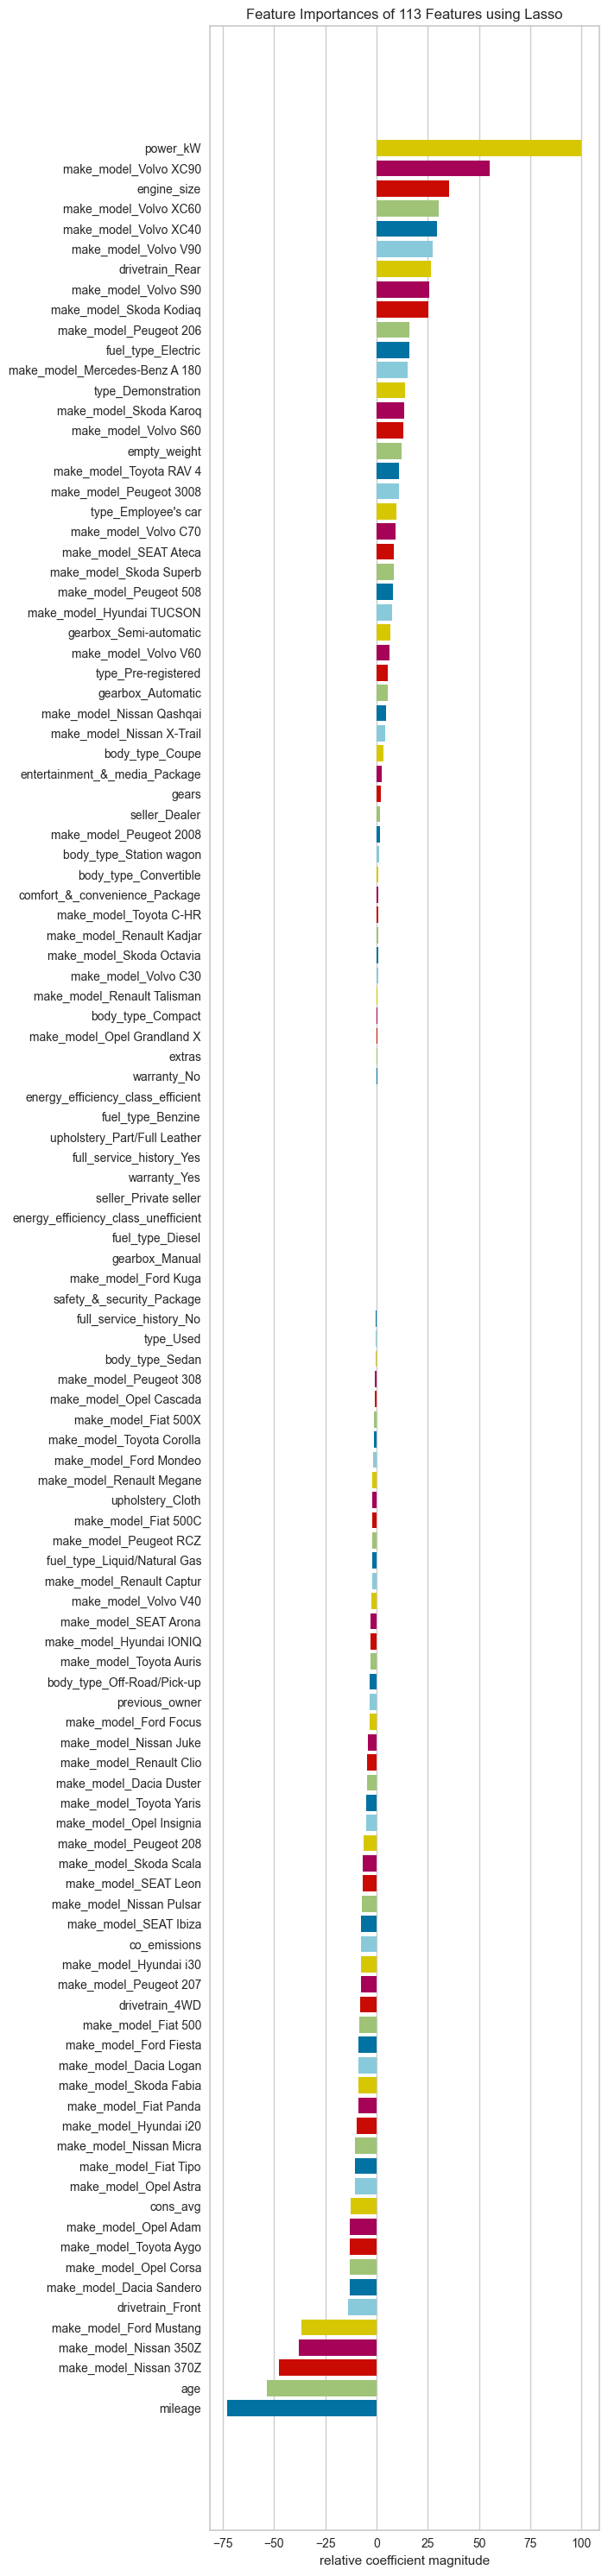

In [201]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=0.001)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train_new).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_new_scaled, y_train)
viz.show();

In [327]:
df_new = df[["make_model", "power_kW", "mileage","age", "engine_size", "type", "price"]]

In [328]:
df_new 

,make_model,power_kW,mileage,age,engine_size,type,price
0,Mercedes-Benz A 180,85.000,27150.000,2.000,1461.000,Used,24400.000
1,Mercedes-Benz A 180,80.000,157500.000,12.000,1991.000,Used,7450.000
2,Mercedes-Benz A 180,85.000,21734.000,2.000,1461.000,Used,29800.000
3,Mercedes-Benz A 180,80.000,172700.000,4.000,1461.000,Used,21000.000
4,Mercedes-Benz A 180,85.000,18989.000,2.000,1461.000,Used,26800.000
...,...,...,...,...,...,...,...
18191,Volvo S90,140.000,93757.000,4.000,1969.000,Used,27190.000
18192,Volvo V40,88.000,114000.000,4.000,1969.000,Used,13000.000
18194,Volvo S90,288.000,40345.000,3.000,1969.000,Used,37600.000
18195,Volvo C30,84.000,96000.000,11.000,1560.000,Used,7300.000


In [329]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [330]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [331]:
X_train.head()

,make_model,power_kW,mileage,age,engine_size,type
5170,Peugeot 308,96.000,66800.000,4.000,1499.000,Used
5981,Fiat 500X,103.000,132062.000,6.000,1368.000,Used
10311,Dacia Duster,85.000,19271.000,1.000,1461.000,Used
9952,Dacia Sandero,67.000,17239.000,3.000,999.000,Used
13142,Nissan Qashqai,87.000,38500.000,12.000,1598.000,Used


In [332]:
X_train_ohe= enc.fit_transform(X_train[['make_model']])
X_train_ohe

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,...,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90
5170,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5981,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10311,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9952,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
13142,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12577,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
13295,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6216,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1055,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [333]:
cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]
enc_2 = OrdinalEncoder(categories=[cat_for_type], handle_unknown="use_encoded_value", unknown_value=-1).set_output(transform="pandas")

In [334]:
X_train_ord_enc= enc_2.fit_transform(X_train[['type']])
X_train_ord_enc

,type
5170,0.000
5981,0.000
10311,0.000
9952,0.000
13142,0.000
...,...
12577,0.000
13295,0.000
6216,0.000
1055,0.000


In [335]:
X_train_num = []
for column in X_train.columns:
    if X_train[column].dtype in ['int64', 'float64']: 
        X_train_num.append(column)
X_train_num = X_train[X_train_num]
X_train_num

,power_kW,mileage,age,engine_size
5170,96.000,66800.000,4.000,1499.000
5981,103.000,132062.000,6.000,1368.000
10311,85.000,19271.000,1.000,1461.000
9952,67.000,17239.000,3.000,999.000
13142,87.000,38500.000,12.000,1598.000
...,...,...,...,...
12577,253.000,72500.000,9.000,3696.000
13295,52.000,61944.000,4.000,999.000
6216,88.000,76220.000,4.000,1598.000
1055,100.000,39460.000,1.000,1956.000


In [336]:
X_train_last= X_train_ohe.join([X_train_ord_enc,X_train_num] )
X_train_last

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,...,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,type,power_kW,mileage,age,engine_size
5170,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,96.000,66800.000,4.000,1499.000
5981,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,103.000,132062.000,6.000,1368.000
10311,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,85.000,19271.000,1.000,1461.000
9952,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,67.000,17239.000,3.000,999.000
13142,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,87.000,38500.000,12.000,1598.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12577,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,253.000,72500.000,9.000,3696.000
13295,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,52.000,61944.000,4.000,999.000
6216,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,88.000,76220.000,4.000,1598.000
1055,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,100.000,39460.000,1.000,1956.000


In [337]:
X_test_ohe= enc.transform(X_test[['make_model']])
X_test_ohe

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,...,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90
3698,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5027,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4894,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3202,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7693,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3464,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10975,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7473,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [338]:
X_test_ord_enc= enc_2.transform(X_test[['type']])
X_test_ord_enc

,type
3698,0.000
5027,0.000
4894,0.000
3202,0.000
7693,0.000
...,...
458,0.000
3464,0.000
10975,3.000
7473,1.000


In [339]:
X_test_num = []
for column in X_test.columns:
    if X_test[column].dtype in ['int64', 'float64']: 
        X_test_num.append(column)
X_test_num = X_test[X_test_num]
X_test_num

,power_kW,mileage,age,engine_size
3698,96.000,7384.000,2.000,1199.000
5027,100.000,150.000,0.000,1199.000
4894,76.000,26805.000,1.000,1199.000
3202,85.000,37421.000,2.000,1333.000
7693,221.000,29943.000,2.000,1984.000
...,...,...,...,...
458,110.000,48124.000,3.000,1364.000
3464,96.000,23247.000,3.000,1199.000
10975,53.000,15.000,0.000,998.000
7473,81.000,9000.000,1.000,999.000


In [340]:
X_test_last= X_test_ohe.join([X_test_ord_enc,X_test_num] )
X_test_last

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,...,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,type,power_kW,mileage,age,engine_size
3698,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,96.000,7384.000,2.000,1199.000
5027,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,100.000,150.000,0.000,1199.000
4894,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,76.000,26805.000,1.000,1199.000
3202,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,85.000,37421.000,2.000,1333.000
7693,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,221.000,29943.000,2.000,1984.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,110.000,48124.000,3.000,1364.000
3464,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,96.000,23247.000,3.000,1199.000
10975,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,3.000,53.000,15.000,0.000,998.000
7473,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,81.000,9000.000,1.000,999.000


In [341]:
scaler = MinMaxScaler().set_output(transform="pandas")

In [342]:
X_train_final=scaler.fit_transform(X_train_last)
X_train_final

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,...,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,type,power_kW,mileage,age,engine_size
5170,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.141,0.161,0.200,0.258
5981,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.160,0.318,0.300,0.235
10311,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.112,0.046,0.050,0.251
9952,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.064,0.042,0.150,0.172
13142,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.117,0.093,0.600,0.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12577,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.559,0.175,0.450,0.636
13295,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.024,0.149,0.200,0.172
6216,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.120,0.184,0.200,0.275
1055,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.152,0.095,0.050,0.337


In [343]:
X_test_final=scaler.transform(X_test_last)
X_test_final

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,...,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,type,power_kW,mileage,age,engine_size
3698,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.141,0.018,0.100,0.206
5027,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.152,0.000,0.000,0.206
4894,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.088,0.065,0.050,0.206
3202,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.112,0.090,0.100,0.229
7693,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.473,0.072,0.100,0.341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.178,0.116,0.150,0.235
3464,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.141,0.056,0.150,0.206
10975,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.027,0.000,0.000,0.172
7473,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.333,0.101,0.022,0.050,0.172


In [344]:
final_model = Lasso(alpha=0.001)
final_model.fit(X_train_final, y_train)

Lasso(alpha=0.001)

In [345]:
y_pred = final_model.predict(X_test_final)
y_train_pred = final_model.predict(X_train_final)

In [346]:
final_lss=train_val(final_model, X_train_final, y_train, X_test_final, y_test, "lasso")
final_lss

,lasso_train,lasso_test
R2,0.856,0.864
mae,2799.646,2816.149
mse,17518265.796,16606141.011
rmse,4185.483,4075.063


## Cross Validate

In [347]:
model = Lasso(alpha=0.001)
scores = cross_validate(model, X_train_final, y_train,
                        scoring=['r2', 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [348]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,3.351,0.028,0.849,0.857,-2791.619,-2800.125,-17840180.635,-17494773.122,-4223.764,-4182.675,-0.143,-0.142
2,3.101,0.027,0.859,0.856,-2873.668,-2791.354,-17940876.492,-17481678.168,-4235.667,-4181.110,-0.145,-0.142
3,3.116,0.016,0.874,0.854,-2749.348,-2810.105,-15145557.553,-17794047.597,-3891.729,-4218.299,-0.140,-0.143
4,3.037,0.045,0.842,0.858,-2840.990,-2789.834,-19624463.041,-17299041.735,-4429.951,-4159.212,-0.146,-0.142
5,3.032,0.031,0.860,0.856,-2838.649,-2800.989,-16424492.538,-17650654.925,-4052.714,-4201.268,-0.144,-0.143
6,3.299,0.044,0.842,0.858,-2808.504,-2794.256,-19227257.475,-17340769.434,-4384.890,-4164.225,-0.144,-0.142
7,3.016,0.024,0.872,0.854,-2788.901,-2807.815,-15490310.646,-17758538.869,-3935.773,-4214.088,-0.142,-0.143
8,3.028,0.025,0.873,0.854,-2716.857,-2813.971,-15688187.495,-17740078.059,-3960.832,-4211.897,-0.141,-0.143
9,3.206,0.036,0.871,0.855,-2789.691,-2805.671,-15808837.149,-17724253.713,-3976.033,-4210.018,-0.141,-0.143
10,2.986,0.024,0.799,0.863,-2964.931,-2777.705,-24528436.613,-16766821.890,-4952.619,-4094.731,-0.147,-0.142


In [349]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.854
train_r2                                           0.856
test_neg_mean_absolute_error                   -2816.316
train_neg_mean_absolute_error                  -2799.182
test_neg_mean_squared_error                -17771859.964
train_neg_mean_squared_error               -17505065.751
test_neg_root_mean_squared_error               -4204.397
train_neg_root_mean_squared_error              -4183.752
test_neg_mean_absolute_percentage_error           -0.143
train_neg_mean_absolute_percentage_error          -0.142
dtype: float64

In [350]:
y_pred = final_model.predict(X_test_final)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = mean_squared_error(y_test, y_pred, squared=False)
fm_mape= mean_absolute_percentage_error(y_test, y_pred)

## 7. Visually Compare Models Performance In a Graph

In [313]:
compare = pd.DataFrame({"Model": ["lm","ridge_model", "lasso_model", "grid_model", "final_model"],
                        "r2_score": [lm_R2, rm_R2, ls_R2, egm_R2, fm_R2],
                        "mae": [lm_mae, rm_mae, ls_mae, egm_mae, fm_mae],
                        "rmse": [lm_rmse, rm_rmse, ls_rmse, egm_rmse, fm_rmse],
                        "mape": [lm_mape, rm_mape, ls_mape, egm_mape, fm_mape]})
compare

,Model,r2_score,mae,rmse,mape
0,lm,0.875,2635.305,3911.986,0.136
1,ridge_model,0.876,2628.870,3897.196,0.136
2,lasso_model,0.876,2627.339,3892.424,0.136
3,grid_model,0.876,2632.809,3902.608,0.136
4,final_model,0.864,2816.149,4075.063,0.145


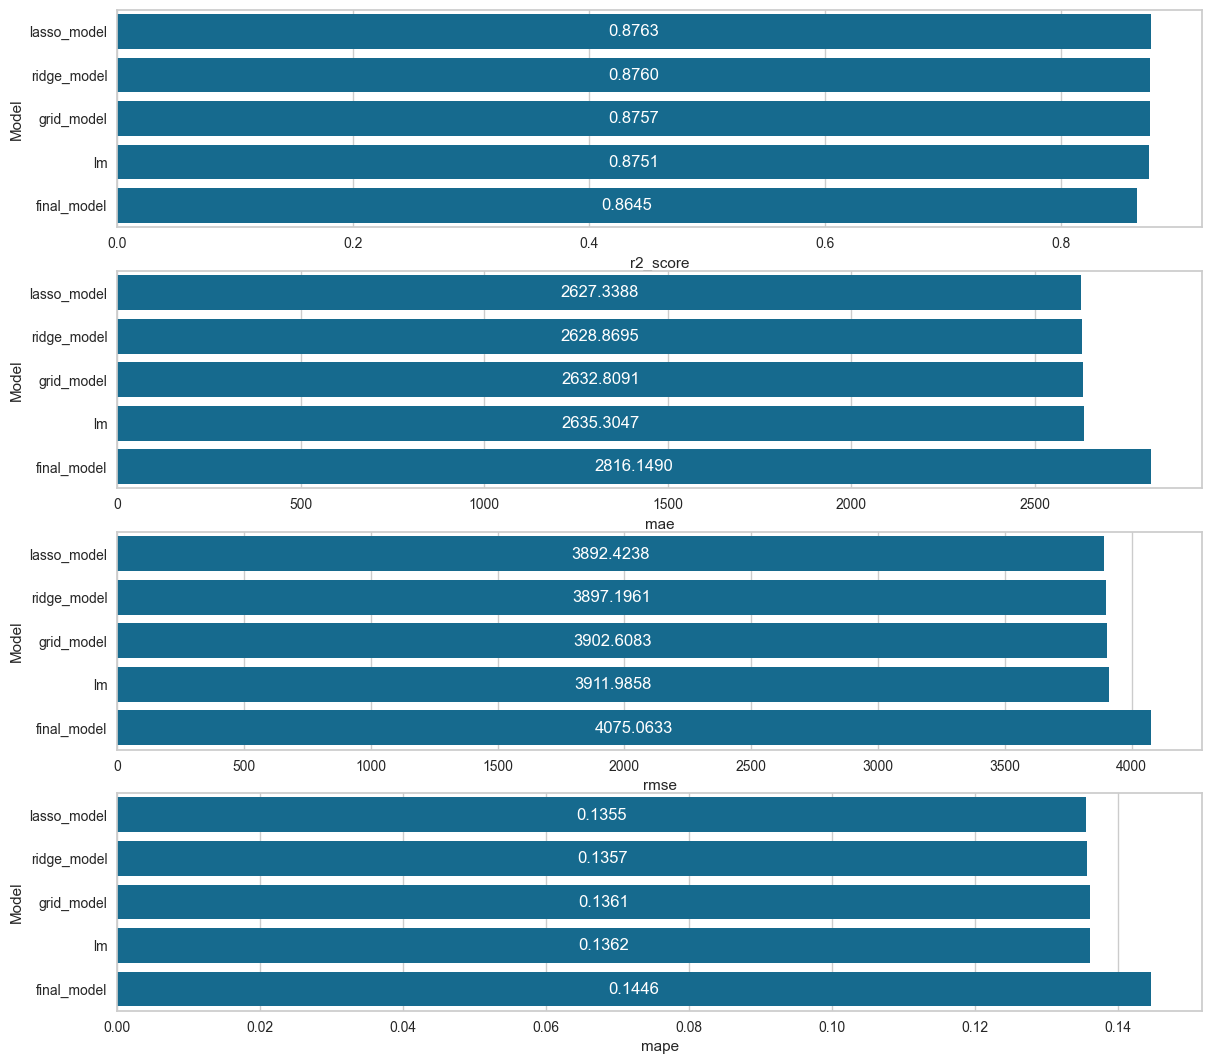

In [274]:
plt.figure(figsize=(14,13))

plt.subplot(411)
compare = compare.sort_values(by="r2_score", ascending=False)
ax=sns.barplot(x="r2_score", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(412)
compare = compare.sort_values(by="mae", ascending=True)
ax=sns.barplot(x="mae", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(413)
compare = compare.sort_values(by="rmse", ascending=True)
ax=sns.barplot(x="rmse", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(414)
compare = compare.sort_values(by="mape", ascending=True)
ax=sns.barplot(x="mape", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")
plt.show();

## Prediction a new observation
- Create an observation and predict its price

In [351]:
df_new

,make_model,power_kW,mileage,age,engine_size,type,price
0,Mercedes-Benz A 180,85.000,27150.000,2.000,1461.000,Used,24400.000
1,Mercedes-Benz A 180,80.000,157500.000,12.000,1991.000,Used,7450.000
2,Mercedes-Benz A 180,85.000,21734.000,2.000,1461.000,Used,29800.000
3,Mercedes-Benz A 180,80.000,172700.000,4.000,1461.000,Used,21000.000
4,Mercedes-Benz A 180,85.000,18989.000,2.000,1461.000,Used,26800.000
...,...,...,...,...,...,...,...
18191,Volvo S90,140.000,93757.000,4.000,1969.000,Used,27190.000
18192,Volvo V40,88.000,114000.000,4.000,1969.000,Used,13000.000
18194,Volvo S90,288.000,40345.000,3.000,1969.000,Used,37600.000
18195,Volvo C30,84.000,96000.000,11.000,1560.000,Used,7300.000


In [352]:
X

,make_model,power_kW,mileage,age,engine_size,type
0,Mercedes-Benz A 180,85.000,27150.000,2.000,1461.000,Used
1,Mercedes-Benz A 180,80.000,157500.000,12.000,1991.000,Used
2,Mercedes-Benz A 180,85.000,21734.000,2.000,1461.000,Used
3,Mercedes-Benz A 180,80.000,172700.000,4.000,1461.000,Used
4,Mercedes-Benz A 180,85.000,18989.000,2.000,1461.000,Used
...,...,...,...,...,...,...
18191,Volvo S90,140.000,93757.000,4.000,1969.000,Used
18192,Volvo V40,88.000,114000.000,4.000,1969.000,Used
18194,Volvo S90,288.000,40345.000,3.000,1969.000,Used
18195,Volvo C30,84.000,96000.000,11.000,1560.000,Used


In [359]:
my_dict = {
    "make_model": "Volvo S90",
    "power_kW": 140,
    "mileage": 30000,
    "age": 2,
    "engine_size": 1969,
    "type" : "Used" 
}

In [360]:
new_obs = pd.DataFrame([my_dict])
new_obs

,make_model,power_kW,mileage,age,engine_size,type
0,Volvo S90,140,30000,2,1969,Used


In [ ]:
final_model.predict(new_obs)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___